# Machine Learning Experiment for Depression - classify depression or no depression

This notebook will produce the results for the machine learning experiment using time series data for my final year project "<i>Machine Learning-Based Human Activity Recognition for the Classification of Depression</i>". This project will use supervised machine learning and it is a classification problem where it will classify patients as <b>depression</b> or <b>non-depression</b>.<br>

Deliverable requirements for machine learning experiment:
- [x] Perform data pre-processing on the <code>afftype</code> and <code>work</code> columns from the <code>scores.csv</code> file before creating the new dataset
- [x] Create the new dataset that is based on features extracted from each patient's actigraph data
- [x] Use machine learning to train the models for the new dataset with and without features from <code>scores.csv</code> without using Leave One Subject Out Cross Validation
- [x] Use machine learning to train the models for the new dataset with and without features from <code>scores.csv</code> with using Leave One Subject Out Cross Validation

The relevant libraries needed for the machine learning experiment are:
* NumPy
* Matplotlib
* Seaborn
* Pandas
* Sci-Kit Learn
* Time Series Feature Extraction Library (TSFEL)

NOTE: Make sure to install the TSFEL library using the command: <code>pip install tsfel</code>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tsfel
import os
import warnings

# Disable warning messages in the code
warnings.filterwarnings("ignore")

## Create the new dataset based on features extracted from each patient's actigraph data

For this deliverable, I will perform data pre-processing on the relevant features from the <code>scores.csv</code> file and then select relevant features that are useful before creating the new dataset. The new dataset will extract time series features from the patient's actigraph data in hourly intervals and add the relevant features from the <code>scores.csv</code> file.

### Data pre-processing on the scores.csv file

Before creating the new dataset, I will perform data pre-processing on the <code>scores.csv</code> file for the relevant features.

In [11]:
# Load the scores.csv file
scores_df = pd.read_csv("data/scores.csv")
scores_df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In the output above, there are missing values in majority of the columns.<br><br>
In terms of feature selection, the columns that would be relevant for the new dataset are number, gender, age, afftype and work columns. As seen above, the gender and age columns are already filled in for all patients but the afftype and work columns have missing values for the non-depressed patients.

To mitigate the risk of missing values for the afftype and work columns, we can perform imputation which replaces missing values with a value.<br>

For the afftype column, we know that value 1 is <b>bipolar II</b>, 2 is <b>unipolar depressive</b> and 3 is <b>bipolar I</b> and we can notice these values are filled in for the depressed patients. However for non-depressed patients, we can impute the value 0 to indicate <b>no depression</b>.<br>

In [12]:
# Look the current count for the afftype column
scores_df["afftype"].value_counts()

2.0    15
1.0     7
3.0     1
Name: afftype, dtype: int64

We notice that only one depressed patient has bipolar I, 7 depressed patients have bipolar II and 15 depressed patients have unipolar. However there are missing values for non-depressed patients in the afftype column, we can impute the value 0 to indicate no depression.

In [13]:
'''
Notice the missing values for non-depressed patients in the afftype column
Impute the value 0 to all non-depressed patients to indicate 'no depression'
''' 
for i in range(23, 55):
    scores_df.at[i, 'afftype'] = 0

scores_df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [14]:
# Look the new count for the afftype column
scores_df["afftype"].value_counts()

0.0    32
2.0    15
1.0     7
3.0     1
Name: afftype, dtype: int64

For the work column, we know that value 1 is <b>working or studying</b> and 2 is <b>unemployed/sick leave/pension</b> and we can notice these values are filled in for the depressed patients. According to Garcia-Ceja, et al. (2018), they mentioned that the non-depressed patients consist of "23 hospital employees, 5 students and 4 former patients without current psychiatric symptoms". With this information we can impute 28 non-depressed patients as the value 1 (working or studying) and the other 4 non-depressed patients as the value 2 (unemployed/sick leave/pension).

In [15]:
# Look the current count for the work column
scores_df["work"].value_counts()

2.0    20
1.0     3
Name: work, dtype: int64

We notice that only 20 depressed patients are unemployed/sick leave/pension and 3 depressed patients are working or studying. However there are missing values for non-depressed patients in the work column. Using the information mentioned above, we can impute the value 1 to 28 non-depressed patients and value 2 to the other 4 non-depressed patients.

In [16]:
'''
We know that there are 23 non-depressed patients who are hospital employees and 5 non-depressed patients who are students
Impute the value 1 to the 28 non-depressed patients to indicate 'working or studying' - control_1 to control_28
''' 
for i in range(23, 51):
    scores_df.at[i, 'work'] = 1

scores_df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [17]:
'''
We know that there are 4 non-depressed patients who were former patients without current psychiatric symptoms
Impute the value 2 to the 4 non-depressed patients to indicate 'unemployed/sick leave/pension' - control_29 to control_32
''' 
for i in range(51, 55):
    scores_df.at[i, 'work'] = 2

scores_df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [18]:
# Look the new count for the work column
scores_df["work"].value_counts()

1.0    31
2.0    24
Name: work, dtype: int64

### Create the new dataset
Now we can create the new dataset based on features extracted from each patient's actigraph data.<br>

For this, we need to create a CSV file of the new dataset and for each patient:
* Use the TSFEL library to extract new features over 2.5 days intervals using temporal data
* Add a new feature to the dataset for patient ID/number so the data points generated have the same value for the appropriate patient ID/number and each 2.5 day window is tied to the appropriate patient
* Add new features for the gender, age and work so that the data points generated have the same value for the appropriate patient
* Add a new feature for the afftype so that the data points generated have the same value for the appropriate patient
* Add a new feature for depression - if the patient has no depression then the value is 0 and if the patient has bipolar I, bipolar II or unipolar depressive then the value is 1

First extract the features for all patients using the TSFEL library.

In [19]:
# Define condition and control folders
condition = "data/condition"
control = "data/control"

In [20]:
# Load a condition and control patient file to see the time series data
condition_1 = pd.read_csv("data/condition/condition_1.csv")
control_1 = pd.read_csv("data/control/control_1.csv")

In [21]:
condition_1

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166
...,...,...,...
23239,2003-05-23 15:19:00,2003-05-23,0
23240,2003-05-23 15:20:00,2003-05-23,0
23241,2003-05-23 15:21:00,2003-05-23,0
23242,2003-05-23 15:22:00,2003-05-23,0


In [22]:
control_1

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264
3,2003-03-18 15:03:00,2003-03-18,662
4,2003-03-18 15:04:00,2003-03-18,293
...,...,...,...
51606,2003-04-23 12:06:00,2003-04-23,3
51607,2003-04-23 12:07:00,2003-04-23,3
51608,2003-04-23 12:08:00,2003-04-23,3
51609,2003-04-23 12:09:00,2003-04-23,3


As seen above the timestamp is recorded in one minute intervals for measuring activity counts from an actigraph watch. We want the TSFEL library to extract new features over hourly intervals.<br>

We can set the sampling frequency as 1 Hz. Using 1 Hz we can multiply this by 3600 minutes (2.5 days) and we get 3600 data points as the window size to extract features in 2.5 days intervals. Temporal features will be used for feature extraction.

In [23]:
# Function to extract features for each patient file
def extract_time_series_features(patient_data):
    # Extract the patient number from the file name - e.g. condition_1.csv is split to condition_1
    patient_number = os.path.basename(patient_data).split('.')[0]
    
    # Load the DataFrame for the patient file
    patient_df = pd.read_csv(patient_data)
    
    # Extract temporal features using TSFEL
    cfg_file = tsfel.get_features_by_domain("temporal")
    
    features = tsfel.time_series_features_extractor(
        cfg_file,
        patient_df["activity"],
        fs=1, # Sampling frequency set at 1 Hz
        window_size=3600, # 2.5 days intervals (2.5 days=3600 minutes) - 1 Hz x 3600 minutes = 3600 data points
        verbose=0
    )
    
    # Insert the patient number as the first column
    features.insert(0, 'number', patient_number)
    return features

In [24]:
# Function to extract features for all patients
def extract_all_patient_features(folder):
    # List to collect the extracted features for all patients
    all_patient_features = []
    
    # Loop through all the files and extract the features
    for f in os.listdir(folder):
        # Check if the file is a CSV file - if so extract the temporal features for all patients
        if f.endswith(".csv"):
            patient_file = os.path.join(folder, f)
            patient_features = extract_time_series_features(patient_file)
            all_patient_features.append(patient_features)
    
    # Concatenate all patients with their temporal features into a new DataFrame
    features_df = pd.concat(all_patient_features, ignore_index=True)
    return features_df

In [25]:
# Extract features for depressed patients
condition_features = extract_all_patient_features(condition)

In [26]:
condition_features

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,condition_9,717688.5,468386331.0,1643.525073,126.552098,0.026396,49.0,0.0,679.0,159.0,837.0,456470.691770,-0.014558,455461.0,560.0
137,condition_9,582191.0,403018398.0,1857.258947,111.625452,0.399000,37.0,0.0,591.0,148.0,798.0,402905.393331,0.007809,401740.0,688.0
138,condition_9,691185.5,508436390.0,1911.619821,127.336205,-0.315921,40.0,0.0,615.0,149.0,806.0,459372.664494,0.012945,458283.0,685.0
139,condition_9,523059.0,332045683.0,1680.213140,102.888024,0.005557,23.0,0.0,522.0,145.0,781.0,371576.191388,-0.013625,370294.0,821.0


In [27]:
condition_features.shape

(141, 15)

After performing feature extraction for depressed patients using temporal data, we can see 14 temporal features extracted from the patients' activity data.<br>

In this extracted data, there are 141 rows and 15 columns (including the number (patient ID) column) for condition patients.

In [28]:
# Extract features for non-depressed patients
control_features = extract_all_patient_features(control)

In [29]:
control_features

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,control_1,804886.0,738816432.0,1630.234007,136.080022,-0.016671,43.0,0.0,619.0,144.0,773.0,490932.345116,-0.017077,489752.0,543.0
1,control_1,837776.0,476905330.0,1909.842084,91.740483,0.073354,0.0,0.0,406.0,100.0,509.0,332167.700077,0.070500,330174.0,367.0
2,control_1,898694.5,779596611.0,2113.790083,138.522645,-0.075854,43.0,0.0,640.0,150.0,761.0,499762.046404,0.040400,498543.0,443.0
3,control_1,625250.0,503482648.0,1733.660311,109.880522,0.046680,17.0,0.0,504.0,139.0,667.0,396980.985661,-0.007309,395460.0,555.0
4,control_1,1037355.0,998187186.0,1664.400631,153.031953,-0.035010,51.0,0.0,624.0,123.0,743.0,551985.561062,-0.042853,550762.0,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0
267,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0
268,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0
269,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0


In [30]:
control_features.shape

(271, 15)

After performing feature extraction for non-depressed patients using temporal data, we can see 14 temporal features extracted from the patients' activity data.<br>

In this extracted data, there are 271 rows and 15 columns (including the number (patient ID) column) for control patients.

We can save these feature extracted data as a CSV file.

In [ ]:
# Save the condition features as a CSV file in the extracted_features_data folder within the new_data folder
condition_features.to_csv("new_data/extracted_features_data/condition_extracted_features.csv", index=False)

In [ ]:
# Save the condition features as a CSV file in the extracted_features_data folder within the new_data folder
control_features.to_csv("new_data/extracted_features_data/control_extracted_features.csv", index=False)

Now the features are extracted for both depressed and non-depressed patients, we will merge the features extracted from condition and control patients with their patient number (identifier) and their temporal features into one new DataFrame.

Add features for gender, age, afftype, and work columns from <code>scores.csv</code> so these are generated to the appropriate patient.

Add a feature for depression state and assign 0 to patients who do not have depression and 1 to patients who have bipolar I, bipolar II and unipolar depression.

In [31]:
# Check temporal features for depressed patients
condition_features

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,condition_9,717688.5,468386331.0,1643.525073,126.552098,0.026396,49.0,0.0,679.0,159.0,837.0,456470.691770,-0.014558,455461.0,560.0
137,condition_9,582191.0,403018398.0,1857.258947,111.625452,0.399000,37.0,0.0,591.0,148.0,798.0,402905.393331,0.007809,401740.0,688.0
138,condition_9,691185.5,508436390.0,1911.619821,127.336205,-0.315921,40.0,0.0,615.0,149.0,806.0,459372.664494,0.012945,458283.0,685.0
139,condition_9,523059.0,332045683.0,1680.213140,102.888024,0.005557,23.0,0.0,522.0,145.0,781.0,371576.191388,-0.013625,370294.0,821.0


In [32]:
# Check temporal features for non-depressed patients
control_features

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,control_1,804886.0,738816432.0,1630.234007,136.080022,-0.016671,43.0,0.0,619.0,144.0,773.0,490932.345116,-0.017077,489752.0,543.0
1,control_1,837776.0,476905330.0,1909.842084,91.740483,0.073354,0.0,0.0,406.0,100.0,509.0,332167.700077,0.070500,330174.0,367.0
2,control_1,898694.5,779596611.0,2113.790083,138.522645,-0.075854,43.0,0.0,640.0,150.0,761.0,499762.046404,0.040400,498543.0,443.0
3,control_1,625250.0,503482648.0,1733.660311,109.880522,0.046680,17.0,0.0,504.0,139.0,667.0,396980.985661,-0.007309,395460.0,555.0
4,control_1,1037355.0,998187186.0,1664.400631,153.031953,-0.035010,51.0,0.0,624.0,123.0,743.0,551985.561062,-0.042853,550762.0,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0
267,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0
268,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0
269,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0


In [33]:
# Concatenate the DataFrames of the temporal features for condition and control patients into a new DataFrame
new_patient_df = pd.concat([condition_features, control_features], ignore_index=True)
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0


In [34]:
# Load scores.csv with the imputed values for afftype and work columns
scores_df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [35]:
# Merge the gender, age, afftype and work columns from scores.csv so they are generated to the appropriate patient
new_patient_df = pd.merge(new_patient_df, scores_df[['number', 'gender', 'age', 'work', 'afftype']], 
                          on='number', how='left')
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,afftype
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,35-39,2.0,2.0
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,35-39,2.0,2.0
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,35-39,2.0,2.0
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,35-39,2.0,2.0
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,35-39,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,30-34,1.0,0.0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,30-34,1.0,0.0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,30-34,1.0,0.0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,30-34,1.0,0.0


In [36]:
# Add depression state feature - assign non-depressed patients to 0 and depressed patients to 1

# Initialise depression state column with 0
new_patient_df["depression_state"] = 0

# Initialise 1 to depressed patients if the value of the number column starts with "condition"
new_patient_df.loc[new_patient_df["number"].str.startswith('condition'), "depression_state"] = 1

new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,afftype,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,35-39,2.0,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,35-39,2.0,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,35-39,2.0,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,35-39,2.0,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,35-39,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,30-34,1.0,0.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,30-34,1.0,0.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,30-34,1.0,0.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,30-34,1.0,0.0,0


In [37]:
# Check the count for depression_state column
new_patient_df["depression_state"].value_counts()

0    271
1    141
Name: depression_state, dtype: int64

We notice that the <code>depression_state</code> label shows the value 1 for condition patients who have either bipolar I, bipolar II and unipolar depression and the value 0 for control patients who do not have depression.

If you recall back to the feature extraction, the condition features DataFrame had 141 rows which is now seen in the above output by the value <b>1</b> in the <code>depression_state</code> column and the control features DataFrame had 271 rows which is now seen in the above output by the value <b>0</b> in the <code>depression_state</code> column.

Finally, we will save this new dataset as a CSV file and use it for training the machine learning models.

In [ ]:
# Save the new_patient_df DataFrame as a CSV file
new_patient_df.to_csv("new_data/depression_time_series_data.csv", index=False)

## Machine Learning with the new dataset

Now the new dataset is created and it has temporal features extracted using TSFEL and the gender, age, afftype and work columns from scores.csv using the values imputed for affype and work features for pre-processing, we can use the dataset to train the machine learning model.

For machine learning, we need to do some pre-processing:
* In the new dataset, the age column are in age groups. Perform Label Encoding using Sci-Kit Learn
* I will be classifying patients as depressed/non-depressed so the target label will be the <code>depression_state</code> column, so remove the <code>afftype</code> column for the depression/non-depression classification

In [2]:
# Load the new dataset
new_patient_df = pd.read_csv("new_data/depression_time_series_data.csv")
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,afftype,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,35-39,2.0,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,35-39,2.0,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,35-39,2.0,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,35-39,2.0,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,35-39,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,30-34,1.0,0.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,30-34,1.0,0.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,30-34,1.0,0.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,30-34,1.0,0.0,0


As seen above the age column has categorical variables (age groups). We need to perform Label Encoding so these values are converted to numerical values.

In [3]:
# Count for age column before Label Encoding
new_patient_df["age"].value_counts()

30-34    68
25-29    66
45-49    59
50-54    53
20-24    52
35-39    46
40-44    35
60-64    15
65-69    12
55-59     6
Name: age, dtype: int64

In [4]:
# Perform Label Encoding for age column
from sklearn.preprocessing import LabelEncoder

# Call the Label Encoder object
label_encoder = LabelEncoder()

# Encode labels in the 'age' column
new_patient_df["age"] = label_encoder.fit_transform(new_patient_df["age"])
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,afftype,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0.0,0


In [5]:
# Count for age column after Label Encoding
new_patient_df["age"].value_counts()

2    68
1    66
5    59
6    53
0    52
3    46
4    35
8    15
9    12
7     6
Name: age, dtype: int64

The <code>age</code> column is now converted to numeric values using Label Encoding.
* 20-24 as 0
* 25-29 as 1
* 30-34 as 2
* 35-39 as 3
* 40-44 as 4
* 45-49 as 5
* 50-54 as 6
* 55-59 as 7
* 60-64 as 8
* 65-69 as 9

This experiment will classify patients as depressed (1) or non-depressed (0). For this classification, the target label will be the <code>depression_state</code> column so we need to remove <code>afftype</code> since the <code>afftype</code> column describes the type of depression.

In [6]:
# Remove afftype column
new_patient_df.drop('afftype', axis=1, inplace=True)
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


### Training the machine learning model

Before we train the machine learning model, we need to drop the number column as the model will learn to classify the patient ID.<br>

For training the model, we will try a few machine learning models without cross validation and then with cross validation using a technique called Leave One Subject Out Cross Validation. Leave One Subject Out Cross Validation will train the model on all but one patient’s data, test it against that patient, and it does the same for each patient.<br>

For the depression/non-depression classification, I will be training the models with the gender, age and work features and then training the models without those features to compare the results.<br>

The evaluation metrics used for this experiment are accuracy, precision, recall, F1 score and balanced accuracy score.

### Feature Selection

Firstly, we will perform feature selection to select the relevant temporal features to use for classification when doing the experiments with the relevant features. To do this, an attribute correlation would be needed to select the most important features for predicting the target <code>depression_state</code>.

In [7]:
# Load the new_patient_df DataFrame
new_patient_df = pd.read_csv("new_data/depression_time_series_data.csv")
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,afftype,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,35-39,2.0,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,35-39,2.0,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,35-39,2.0,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,35-39,2.0,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,35-39,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,30-34,1.0,0.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,30-34,1.0,0.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,30-34,1.0,0.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,30-34,1.0,0.0,0


In [8]:
# Remove number and afftype column
new_patient_df.drop(columns=['number', 'afftype'], axis=1, inplace=True)
new_patient_df

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,35-39,2.0,1
1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,35-39,2.0,1
2,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,35-39,2.0,1
3,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,35-39,2.0,1
4,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,35-39,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,30-34,1.0,0
408,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,30-34,1.0,0
409,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,30-34,1.0,0
410,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,30-34,1.0,0


In [9]:
# Remove age, gender and work column
new_patient_df.drop(columns=['age', 'work', 'gender'], axis=1, inplace=True)
new_patient_df

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,depression_state
0,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,1
1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,1
2,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,1
3,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,1
4,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,0
408,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,0
409,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,0
410,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,0


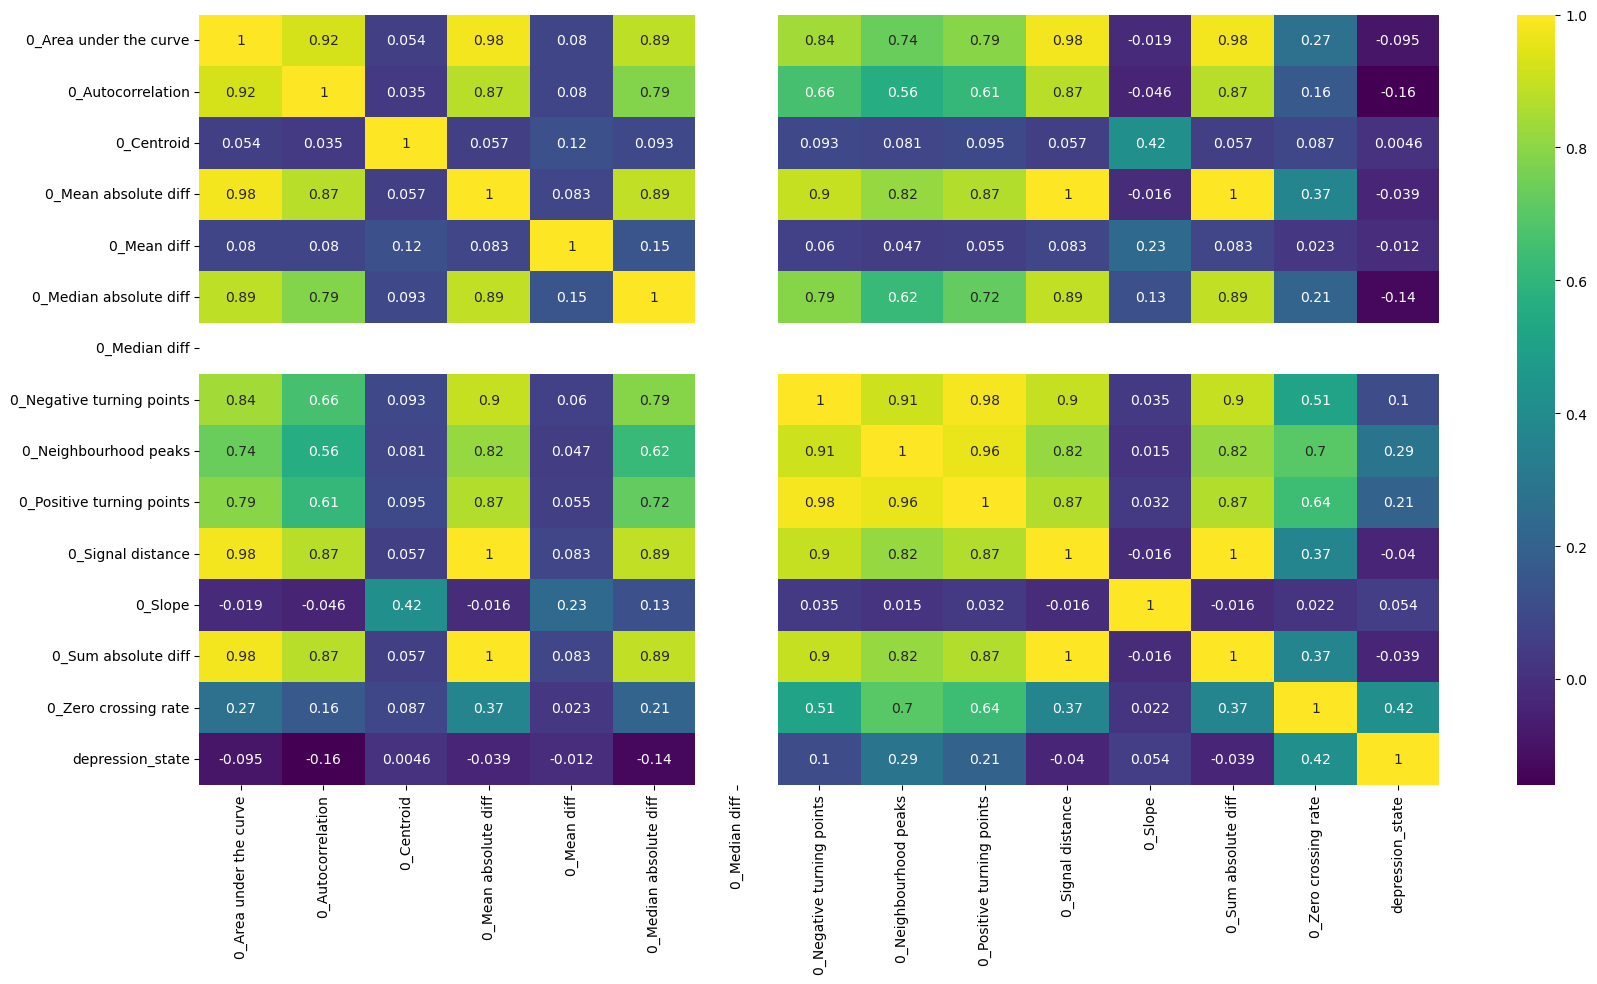

In [10]:
# Figure size
plt.figure(figsize=(20,10))

patient_corr = new_patient_df.corr()

# Plot the correlation matrix
corr_mat = sns.heatmap(patient_corr, annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

We can provide a strong correlation between the independent features and the target variable. For positive correlation we can select features that are above 0.05 and for negative correlation we can select features that below -0.05.

The correlation between the independent features and target variable that are above 0.05 are 0_Negative turning points, 0_Neighbourhood peaks, 0_Positive turning points, 0_Slope and 0_Zero crossing rate.

The correlation between the independent features and target variable that are below -0.05 are 0_Area under the curve, 0_Autocorrelation and 0_Median absolute diff.

Overall we have 8 relevant features needed for feature selection.

In [2]:
# Load the new_patient_df DataFrame
new_patient_df = pd.read_csv("new_data/depression_time_series_data.csv")
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,afftype,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,35-39,2.0,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,35-39,2.0,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,35-39,2.0,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,35-39,2.0,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,35-39,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,30-34,1.0,0.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,30-34,1.0,0.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,30-34,1.0,0.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,30-34,1.0,0.0,0


In [3]:
new_patient_df.drop(columns=['afftype'], axis=1, inplace=True)
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,35-39,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,35-39,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,35-39,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,35-39,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,35-39,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,30-34,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,30-34,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,30-34,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,30-34,1.0,0


In [4]:
# Perform Label Encoding for age column
from sklearn.preprocessing import LabelEncoder

# Call the Label Encoder object
label_encoder = LabelEncoder()

# Encode labels in the 'age' column
new_patient_df["age"] = label_encoder.fit_transform(new_patient_df["age"])
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


Using this new dataset for classifying depression/non-depression, the independent variables <code>X</code> are the temporal features and the gender, age and work features and the dependent variable <code>y</code> is the <code>depression_state</code> label.

#### Random Forest

The first machine learning model that will be used to train the dataset is Random Forest. We will train the Random Forest model with the gender, age and work features and then train the Random Forest model without those features. This will be done without cross validation first and then with cross validation.

**Train the Random Forest model with the gender, age and work features without Leave One Subject Out Cross Validation**

In [9]:
from sklearn.model_selection import train_test_split

'''
Train the Random Forest model with the gender, age and work features without cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [10]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0,2,3,2.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0,1,5,2.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0,2,4,1.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0,1,0,1.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0,2,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0,2,4,2.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0,1,5,2.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0,1,3,1.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0,1,1,1.0


In [12]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0,1,3,1.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0,1,6,2.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0,1,6,1.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0,1,8,2.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0,2,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0,2,1,1.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0,2,4,1.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0,1,2,2.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0,2,2,1.0


In [13]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [14]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [15]:
# Train Random Forest with the gender, age and work features without cross validation
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predict the class for the independent variables
y_pred = rf_clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [18]:
# Evaluation metric results for Random Forest with the gender, age and work features without cross validation

# Accuracy score for Random Forest
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Random Forest
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Random Forest
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Random Forest
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Random Forest
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.9156626506024096
Precision:  0.9354838709677419
Recall:  0.8529411764705882
F1 Score:  0.8923076923076922
Balanced Accuracy:  0.906062424969988


When training the Random Forest model with the gender, age and work features, it produced an accuracy score of 0.9156626506024096 (91.56%)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
# Confusion matrix for the Random Forest model with the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[47,  2],
       [ 5, 29]], dtype=int64)

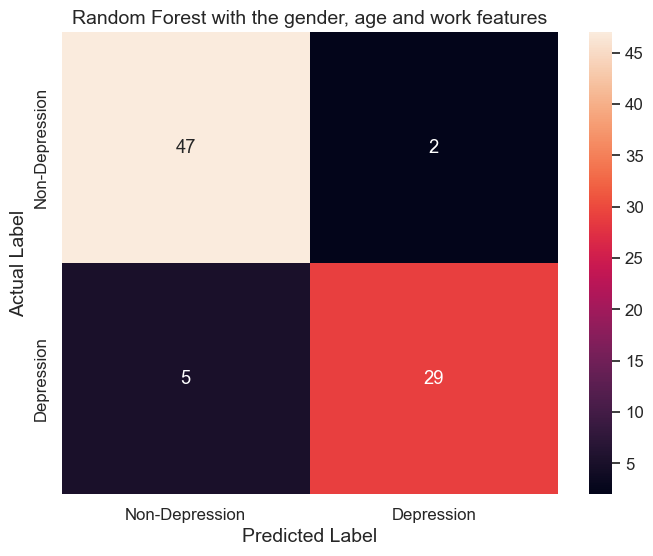

In [21]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("Random Forest with the gender, age and work features", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 47, True Negative (TN) is 29, False Positive (FP) is 5 and False Negative (FN) is 2.<br>

Out of the 83 predictions, Random Forest has made 76 correct predictions and 7 incorrect predictions when including the gender, age and work features.

**Train the Random Forest model with the gender, age and work features with Leave One Subject Out Cross Validation**

In [34]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [23]:
# Perform the Leave One Subject Out Cross Validation by importing Sci-kit Learn's LeaveOneGroupOut class
from sklearn.model_selection import LeaveOneGroupOut

In [35]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

In [36]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

'''
Train the Random Forest model with the gender, age and work features with cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest model using Leave One Subject Out Cross Validation
    rf_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = rf_clf.predict(X_test)
    
    # Accuracy score for Random Forest
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Random Forest
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Random Forest
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Random Forest
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Random Forest
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)


'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Random Forest
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Random Forest
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Random Forest
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Random Forest
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Random Forest
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [1.0, 1.0, 1.0, 1.0, 0.5714285714285714, 1.0, 0.3333333333333333, 0.7272727272727273, 1.0, 1.0, 1.0, 0.8, 0.8571428571428571, 1.0, 1.0, 0.75, 0.8333333333333334, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.7777777777777778, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.6428571428571429, 0.5714285714285714, 1.0, 1.0, 1.0, 0.9285714285714286, 1.0, 1.0]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [1.0, 1.0, 1.0, 1.0, 0.5714285714285714, 1.0, 0.3333333333333333, 0.7272727272727273, 1.0, 1.0, 1.0, 0.8, 0.8571428571428571, 1.0, 1.0, 0.75, 0.8333333333333334, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Using the Leave One Subject Out Cross Validation, the Random Forest model has a mean accuracy of 0.8416935589662863 (84.16%) when including the gender, age and work features

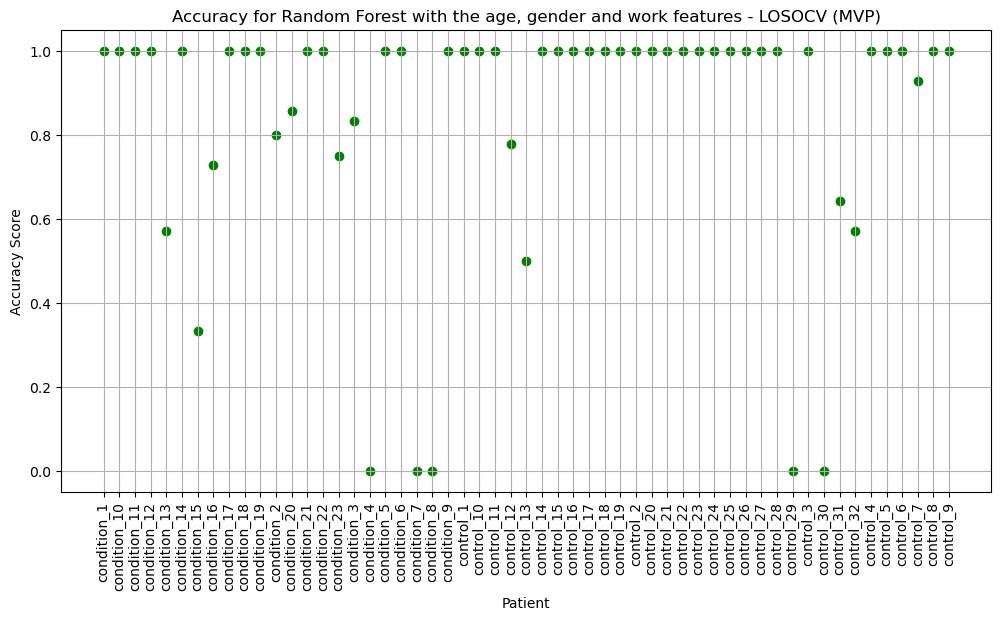

In [37]:
# Plot the scatter plot for Accuracy
x = np.arange(len(accuracy_results))
y = accuracy_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Accuracy for Random Forest with the age, gender and work features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

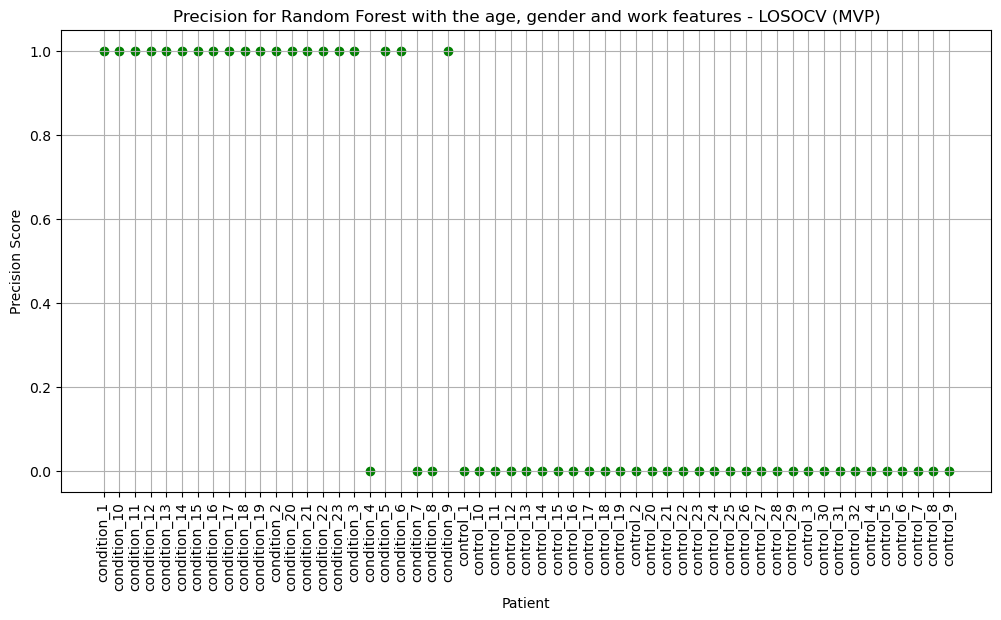

In [41]:
# Plot the scatter plot for Precision
x = np.arange(len(precision_results))
y = precision_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Precision for Random Forest with the age, gender and work features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Precision Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

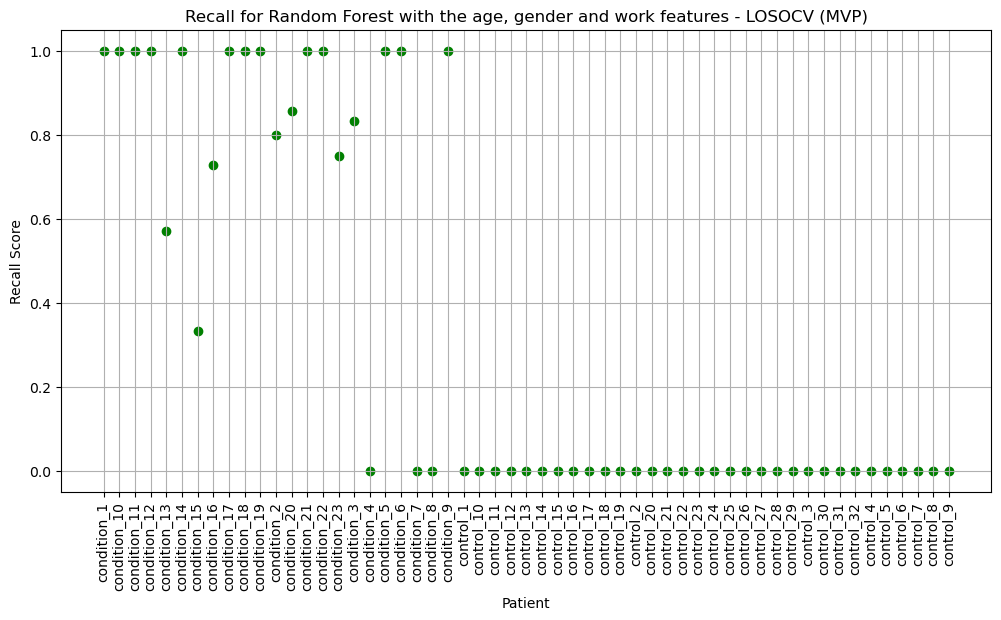

In [42]:
# Plot the scatter plot for Recall
x = np.arange(len(recall_results))
y = recall_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Recall for Random Forest with the age, gender and work features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Recall Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

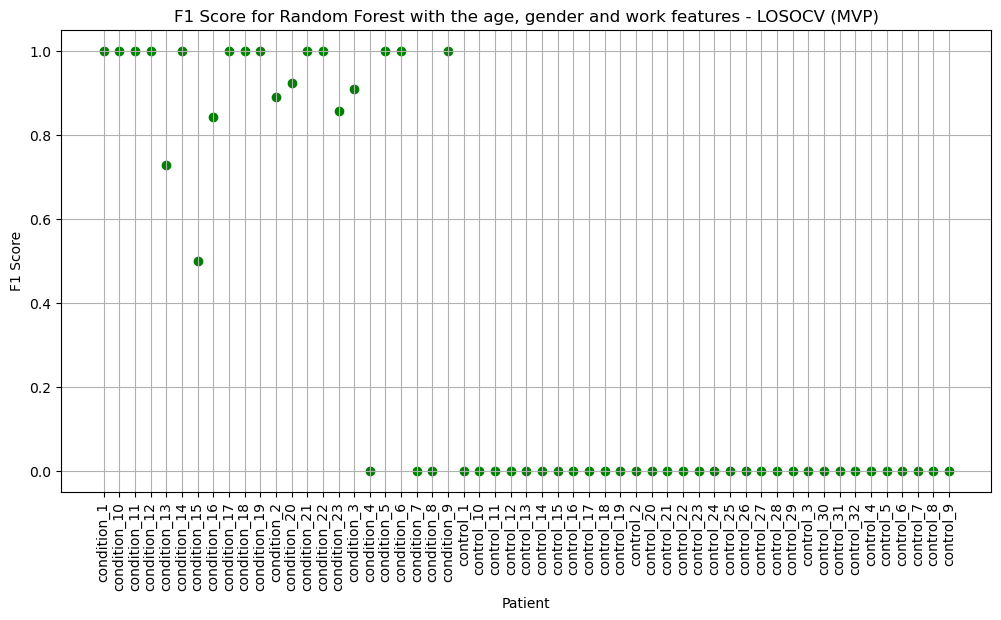

In [43]:
# Plot the scatter plot for F1 Score
x = np.arange(len(f1_score_results))
y = f1_score_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("F1 Score for Random Forest with the age, gender and work features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("F1 Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

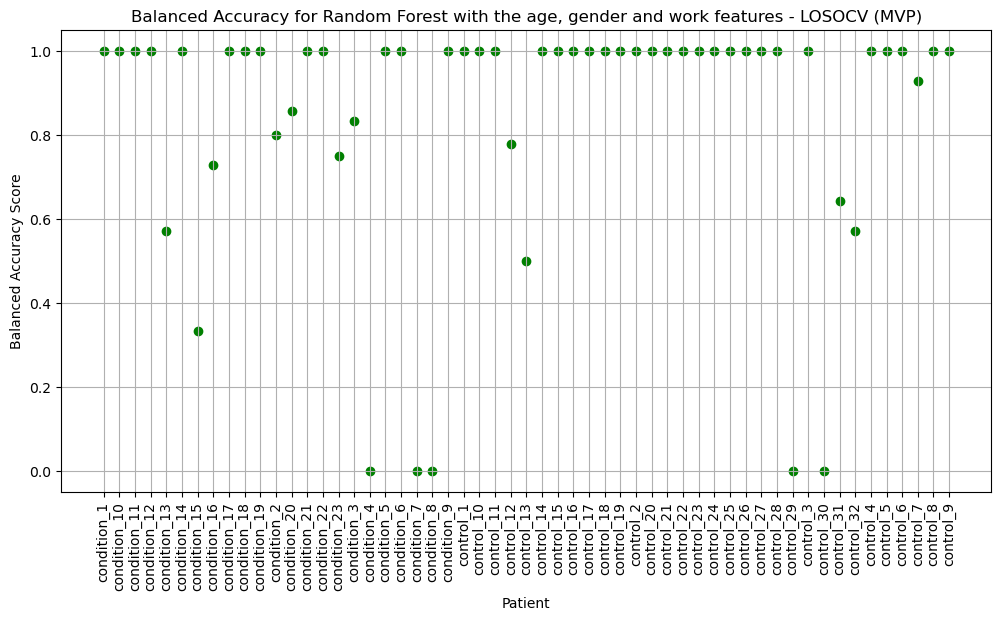

In [44]:
# Plot the scatter plot for Balanced Accuracy
x = np.arange(len(balanced_accuracy_results))
y = balanced_accuracy_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Balanced Accuracy for Random Forest with the age, gender and work features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Balanced Accuracy Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

**Train the Random Forest model with all the temporal features without Leave One Subject Out Cross Validation**

In [29]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [30]:
'''
Train the Random Forest model without the gender, age and work features without cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [31]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0


In [33]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0


In [34]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [35]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [36]:
# Train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Predict the class for the independent variables
y_pred = rf_clf.predict(X_test)

In [38]:
# Evaluation metric results for Random Forest without the gender, age and work features without cross validation

# Accuracy score for Random Forest
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Random Forest
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Random Forest
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Random Forest
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Random Forest
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.7349397590361446
Precision:  0.7307692307692307
Recall:  0.5588235294117647
F1 Score:  0.6333333333333334
Balanced Accuracy:  0.7079831932773109


When training the Random Forest model without the gender, age and work features, it produced an accuracy score of 0.7349397590361446 (73.49%)

In [39]:
# Confusion matrix for the Random Forest model without the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[42,  7],
       [15, 19]], dtype=int64)

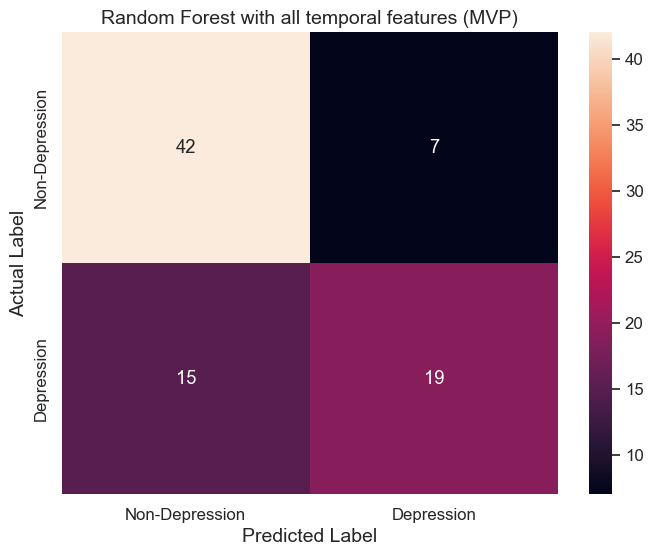

In [40]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("Random Forest with all temporal features (MVP)", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 42, True Negative (TN) is 19, False Positive (FP) is 15 and False Negative (FN) is 7.

Out of the 83 predictions, Random Forest has made 61 correct predictions and 22 incorrect predictions when removing the gender, age and work features.

**Train the Random Forest model with all temporal features with Leave One Subject Out Cross Validation**

In [5]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [6]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

In [7]:
from sklearn.metrics import confusion_matrix

# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []


'''
Train the Random Forest model without the gender, age and work features with cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest model using Leave One Subject Out Cross Validation
    rf_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = rf_clf.predict(X_test)
    
    # Accuracy score for Random Forest
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Random Forest
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Random Forest
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Random Forest
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Random Forest
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    
print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Random Forest
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Random Forest
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Random Forest
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Random Forest
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Random Forest
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.8333333333333334, 0.2, 0.6666666666666666, 0.6666666666666666, 0.2857142857142857, 0.8333333333333334, 0.6666666666666666, 0.2727272727272727, 1.0, 1.0, 0.6, 0.1, 0.8571428571428571, 1.0, 0.16666666666666666, 0.25, 0.0, 0.4, 0.6, 0.6, 0.5, 0.6, 1.0, 0.7857142857142857, 1.0, 1.0, 0.5555555555555556, 0.3333333333333333, 1.0, 1.0, 1.0, 0.625, 1.0, 0.8571428571428571, 1.0, 1.0, 0.875, 0.5, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6428571428571429, 0.375, 1.0, 1.0, 0.8571428571428571, 1.0, 0.375]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [0.8333333333333334, 0.2, 0.6666666666666666, 0.6666666666666666, 0.2857142857142857, 0.8333333333333334, 0.6666666666666666, 0.2727272727272727, 1.0, 1.0, 0.6, 0.1, 0.8

Using the Leave One Subject Out Cross Validation, the Random Forest model has a mean accuracy of 0.7402544929817656 (74.02%) when removing the gender, age and work features

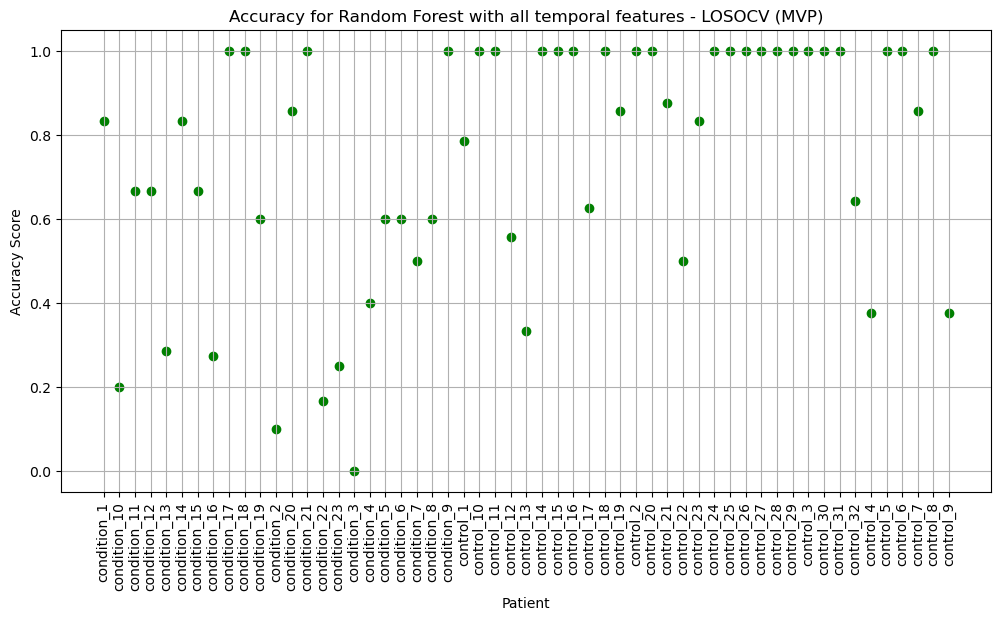

In [29]:
# Plot the scatter plot for Accuracy
x = np.arange(len(accuracy_results))
y = accuracy_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Accuracy for Random Forest with all temporal features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

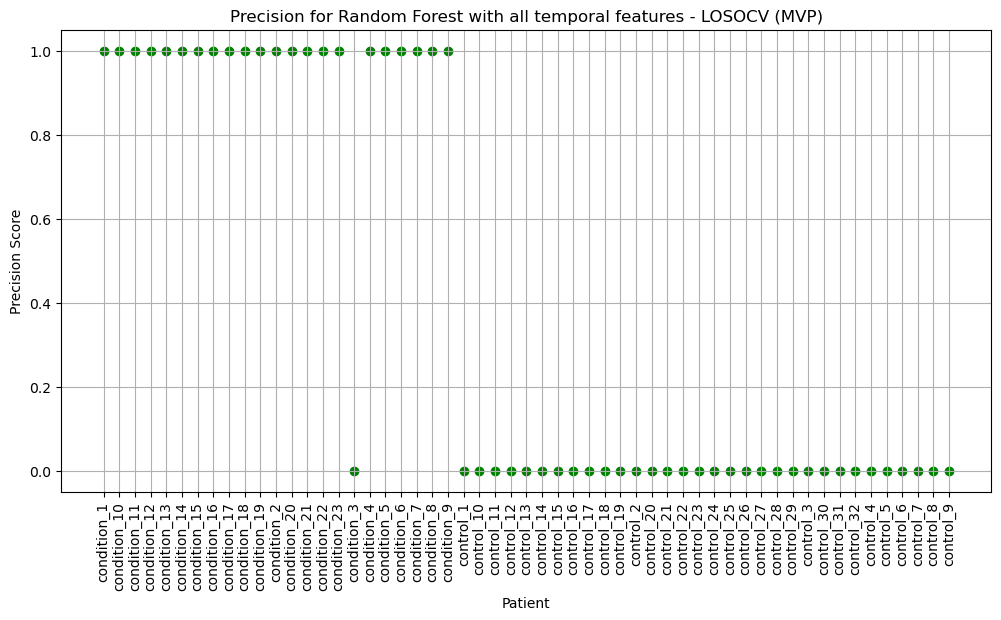

In [30]:
# Plot the scatter plot for Precision
x = np.arange(len(precision_results))
y = precision_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Precision for Random Forest with all temporal features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Precision Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

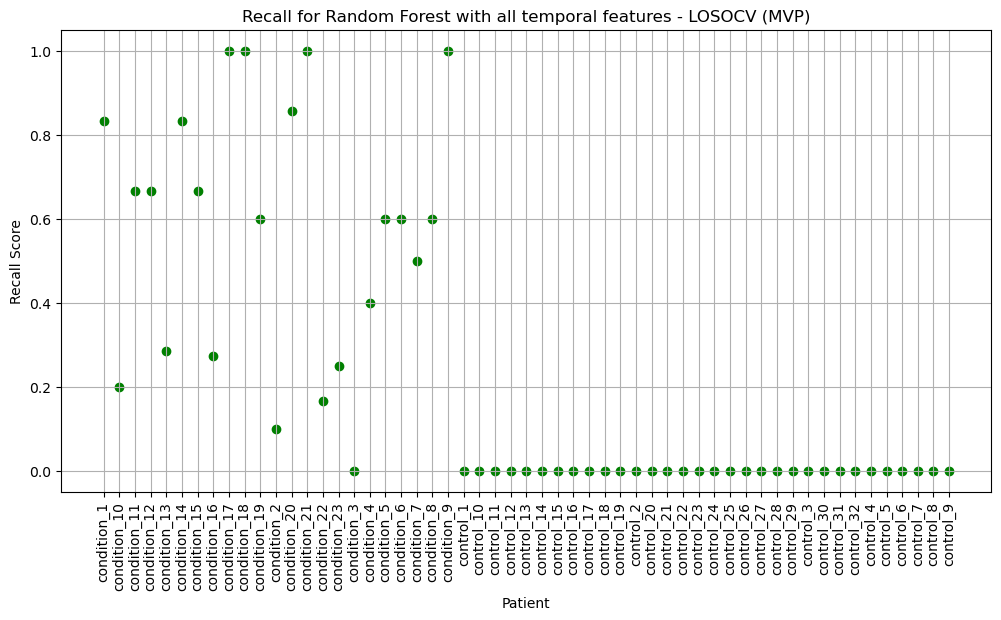

In [31]:
# Plot the scatter plot for Recall
x = np.arange(len(recall_results))
y = recall_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Recall for Random Forest with all temporal features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Recall Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

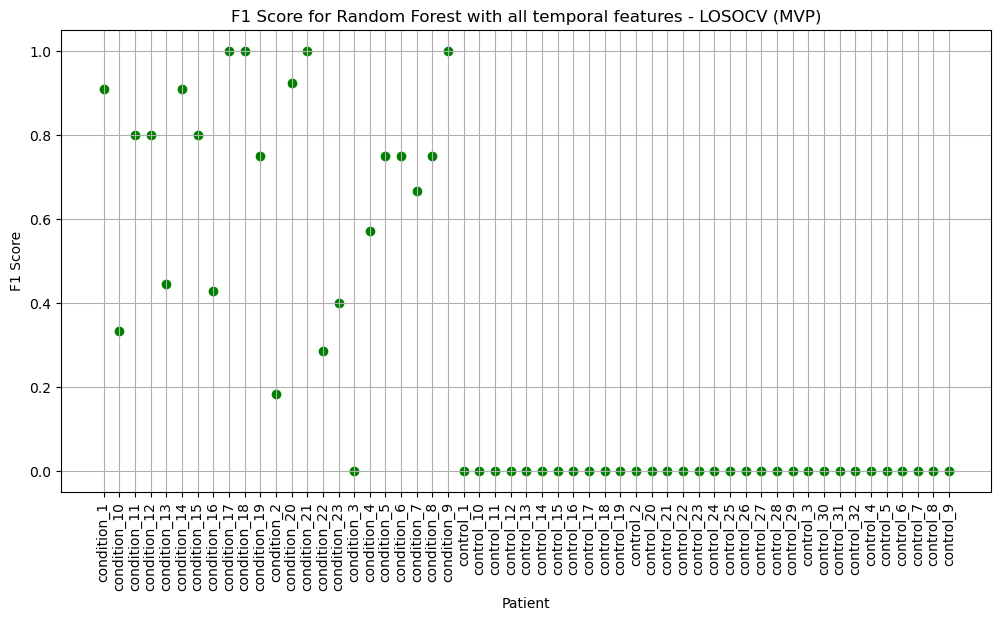

In [32]:
# Plot the scatter plot for F1 Score
x = np.arange(len(f1_score_results))
y = f1_score_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("F1 Score for Random Forest with all temporal features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("F1 Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

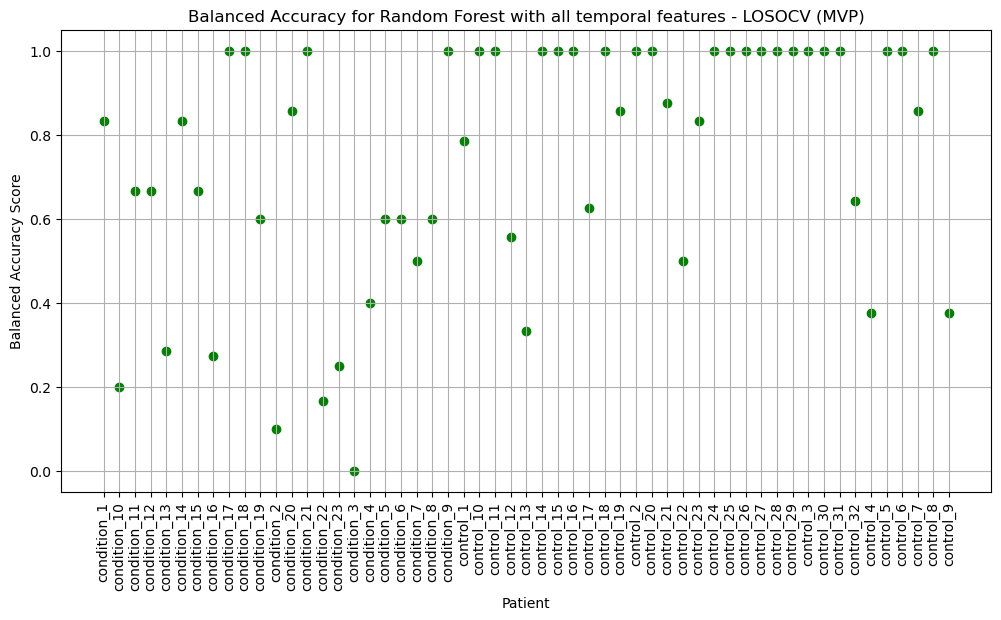

In [33]:
# Plot the scatter plot for Balanced Accuracy
x = np.arange(len(balanced_accuracy_results))
y = balanced_accuracy_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Balanced Accuracy for Random Forest with all temporal features - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Balanced Accuracy Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

**Train the Random Forest model with the relevant features without Leave One Subject Out Cross Validation**

In [45]:
# Load new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [46]:
'''
Train the Random Forest model with the relevant temporal without cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [47]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
5,492290.0,6.062835e+08,6.0,487.0,121.0,645.0,0.018246,575.0
45,648569.5,4.581578e+08,18.0,507.0,153.0,679.0,-0.006847,533.0
401,872964.0,6.590095e+08,16.0,515.0,115.0,600.0,-0.103752,239.0
392,10719.0,3.216600e+04,0.0,6.0,0.0,5.0,-0.000011,26.0
118,633344.5,5.015080e+08,25.0,648.0,142.0,795.0,0.029176,636.0
...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,47.0,638.0,153.0,752.0,-0.073749,0.0
106,978368.5,7.963274e+08,40.0,633.0,145.0,738.0,0.010696,0.0
270,1394837.5,1.431363e+09,62.0,592.0,152.0,709.0,-0.079600,364.0
348,712683.5,7.299986e+08,18.0,501.0,160.0,675.0,-0.021857,557.0


In [49]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
272,1022557.5,849923175.0,56.0,619.0,137.0,735.0,-0.035562,362.0
55,337284.0,123815164.0,28.0,641.0,134.0,801.0,0.001700,640.0
238,917475.0,687391684.0,35.0,581.0,123.0,716.0,-0.058945,499.0
33,320557.0,172586793.0,0.0,349.0,112.0,551.0,-0.011008,607.0
286,950733.0,793662601.0,68.0,721.0,149.0,838.0,-0.017848,428.0
...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,0.0,21.0,0.0,18.0,-0.000033,92.0
198,844099.5,506985620.0,72.0,738.0,144.0,852.0,0.018197,433.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
406,550528.5,327319639.0,27.0,619.0,141.0,776.0,0.007817,673.0


In [50]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [51]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

In [52]:
# Train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Predict the class for the independent variables
y_pred = rf_clf.predict(X_test)

In [54]:
# Evaluation metric results for Random Forest with the relevant features without cross validation

# Accuracy score for Random Forest
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Random Forest
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Random Forest
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Random Forest
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Random Forest
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.7349397590361446
Precision:  0.7307692307692307
Recall:  0.5588235294117647
F1 Score:  0.6333333333333334
Balanced Accuracy:  0.7079831932773109


In [55]:
# Confusion matrix for the Random Forest model with relevant features
confusion_matrix(y_test, y_pred)

array([[42,  7],
       [15, 19]], dtype=int64)

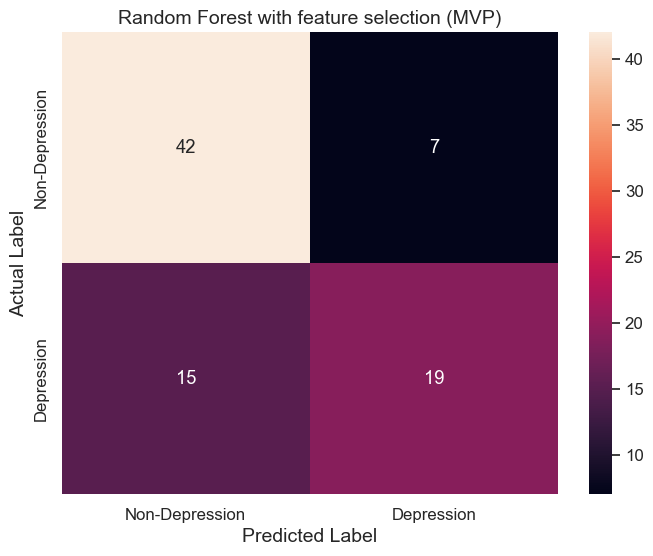

In [56]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("Random Forest with feature selection (MVP)", fontsize=14)

plt.show()

**Train the Random Forest model with the relevant features with Leave One Subject Out Cross Validation**

In [46]:
# Load new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [47]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

In [48]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

'''
Train the Random Forest model with the relevant temporal with cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest model using Leave One Subject Out Cross Validation
    rf_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = rf_clf.predict(X_test)
    
    # Accuracy score for Random Forest
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Random Forest
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Random Forest
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Random Forest
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Random Forest
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Random Forest
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Random Forest
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Random Forest
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Random Forest
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Random Forest
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.6666666666666666, 0.2, 0.6666666666666666, 0.5, 0.42857142857142855, 0.8333333333333334, 0.6666666666666666, 0.2727272727272727, 1.0, 1.0, 0.4, 0.2, 0.8571428571428571, 1.0, 0.5, 0.5, 0.0, 0.4, 0.8, 0.4, 0.8333333333333334, 0.6, 1.0, 0.8571428571428571, 1.0, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 1.0, 1.0, 1.0, 0.625, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6428571428571429, 0.375, 1.0, 1.0, 0.8571428571428571, 1.0, 0.5]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [0.6666666666666666, 0.2, 0.6666666666666666, 0.5, 0.42857142857142855, 0.8333333333333334, 0.6666666666666666, 0.2727272727272727, 1.0, 1.0, 0.

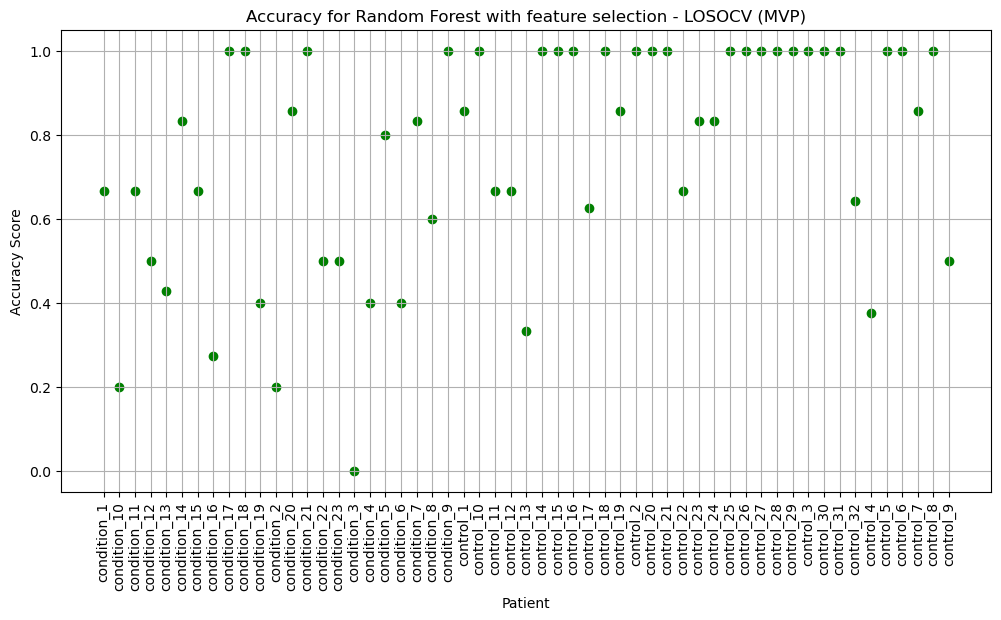

In [49]:
# Plot the scatter plot for Accuracy
x = np.arange(len(accuracy_results))
y = accuracy_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Accuracy for Random Forest with feature selection - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

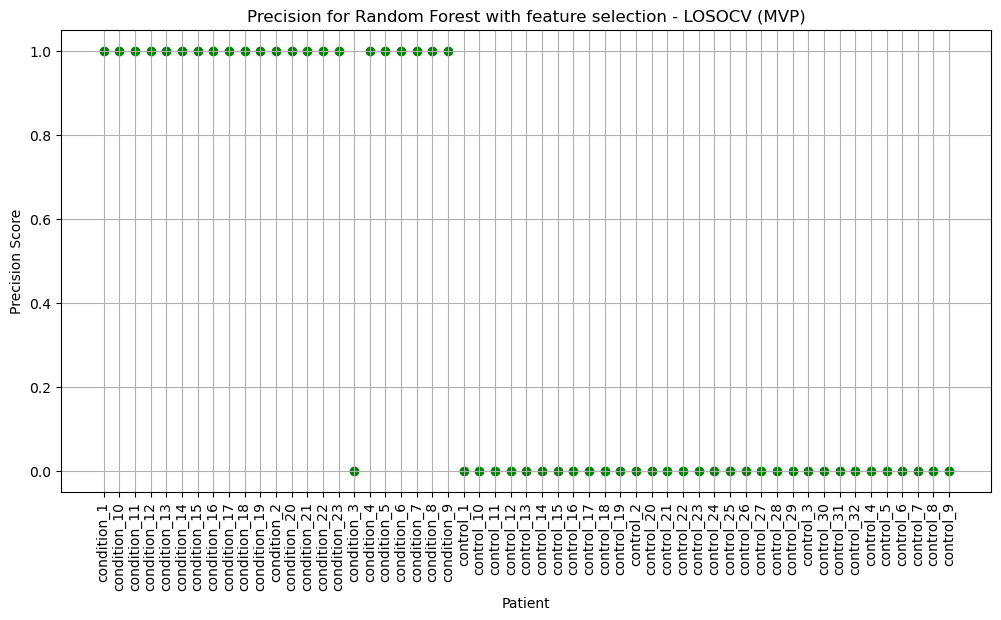

In [50]:
# Plot the scatter plot for Precision
x = np.arange(len(precision_results))
y = precision_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Precision for Random Forest with feature selection - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Precision Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

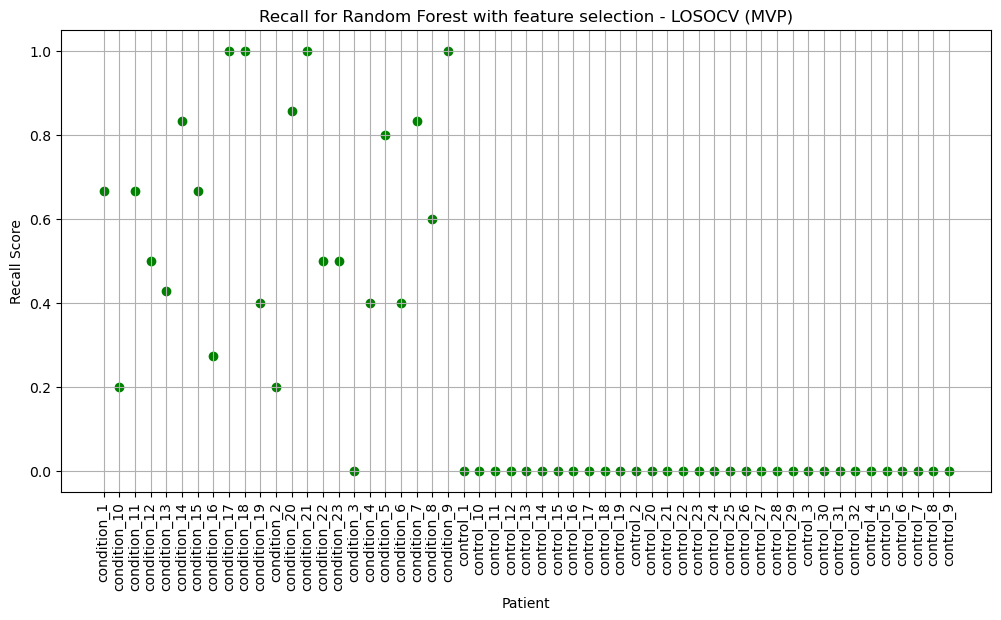

In [51]:
# Plot the scatter plot for Recall
x = np.arange(len(recall_results))
y = recall_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Recall for Random Forest with feature selection - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Recall Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

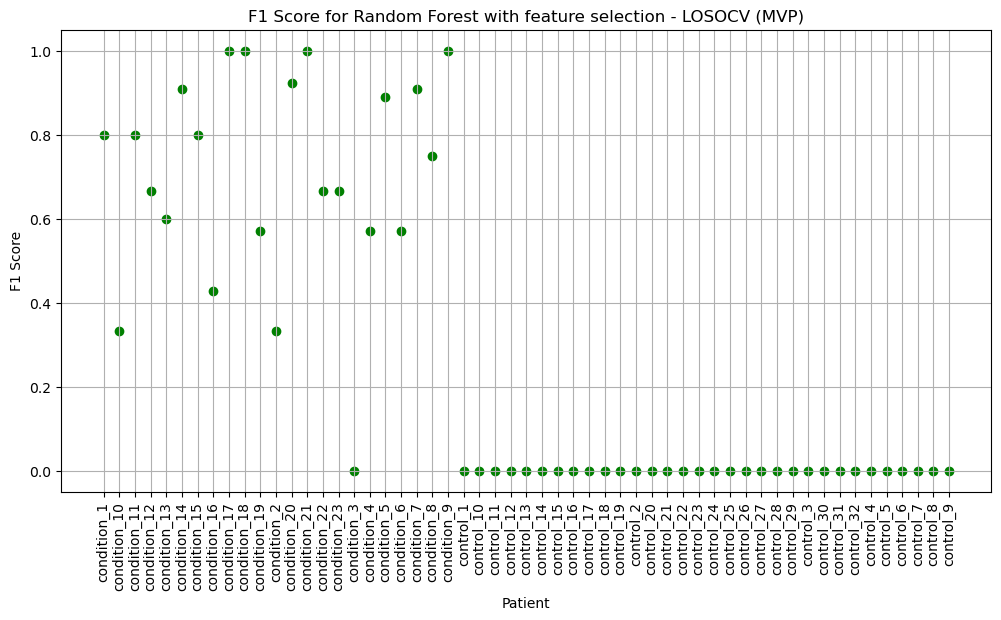

In [52]:
# Plot the scatter plot for F1 Score
x = np.arange(len(f1_score_results))
y = f1_score_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("F1 Score for Random Forest with feature selection - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("F1 Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

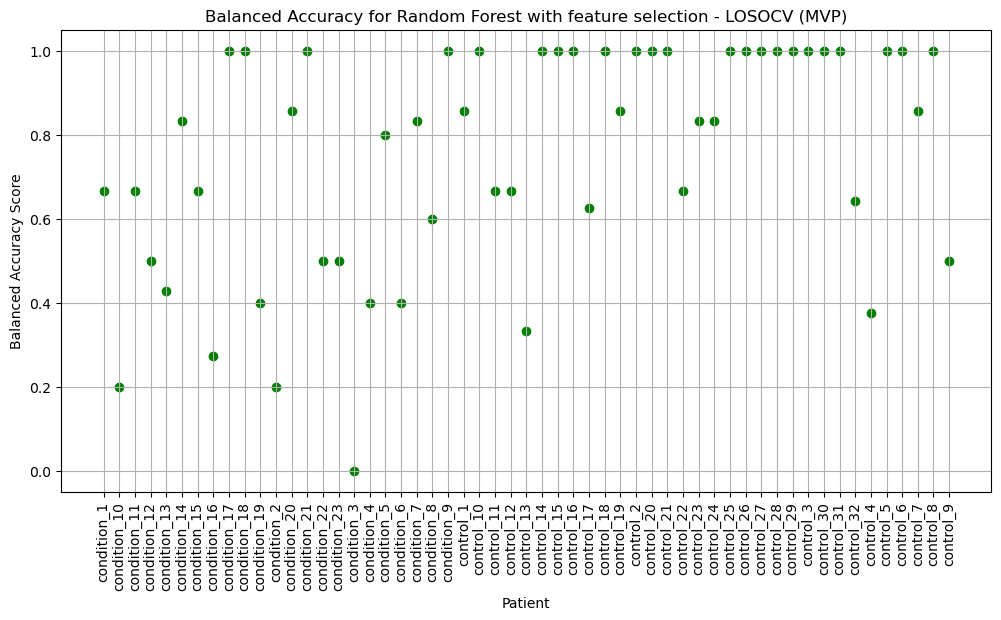

In [53]:
# Plot the scatter plot for Balanced Accuracy
x = np.arange(len(balanced_accuracy_results))
y = balanced_accuracy_results

# Tick labels for each patient ID
patient_labels = ["condition_1", "condition_10", "condition_11", "condition_12", "condition_13", "condition_14",
                  "condition_15", "condition_16", "condition_17", "condition_18", "condition_19", "condition_2",
                  "condition_20", "condition_21", "condition_22", "condition_23", "condition_3", "condition_4",
                  "condition_5", "condition_6", "condition_7", "condition_8", "condition_9", "control_1",
                  "control_10", "control_11", "control_12", "control_13", "control_14", "control_15", "control_16",
                  "control_17", "control_18", "control_19", "control_2", "control_20", "control_21", "control_22",
                  "control_23", "control_24", "control_25", "control_26", "control_27", "control_28", "control_29",
                  "control_3", "control_30", "control_31", "control_32", "control_4", "control_5", "control_6",
                  "control_7", "control_8", "control_9"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='green')
plt.title("Balanced Accuracy for Random Forest with feature selection - LOSOCV (MVP)")
plt.xlabel("Patient")
plt.ylabel("Balanced Accuracy Score")
plt.grid(True)
plt.xticks(x, patient_labels, rotation=90)
plt.show()

#### K-Nearest Neighbours

The second machine learning model that will be used to train the dataset is K-Nearest Neigbours. We will train the K-Nearest Neigbours model with the gender, age and work features and then train the K-Nearest Neigbours model without those features. This will be done without cross validation first and then with cross validation.

**Train the K-Nearest Neighbours model with the gender, age and work features without Leave One Subject Out Cross Validation**

In [60]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [61]:
'''
Train the K-Nearest Neighbours model with the gender, age and work features without cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [62]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0,2,3,2.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0,1,5,2.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0,2,4,1.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0,1,0,1.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0,2,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0,2,4,2.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0,1,5,2.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0,1,3,1.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0,1,1,1.0


In [64]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0,1,3,1.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0,1,6,2.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0,1,6,1.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0,1,8,2.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0,2,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0,2,1,1.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0,2,4,1.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0,1,2,2.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0,2,2,1.0


In [65]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [66]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [67]:
# Train K-Nearest Neighbours with the gender, age and work features without cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Feature Scaling using Standard Scaler before fitting the KNN model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the K-Nearest Neighbours model - use 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [68]:
# Predict the class for the independent variables
y_pred = knn_clf.predict(X_test_scaled)

In [69]:
# Evaluation metric results for K-Nearest Neighbours with the gender, age and work features without cross validation

# Accuracy score for K-Nearest Neighbours
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for K-Nearest Neighbours
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for K-Nearest Neighbours
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for K-Nearest Neighbours
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for K-Nearest Neighbours
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.891566265060241
Precision:  0.9629629629629629
Recall:  0.7647058823529411
F1 Score:  0.8524590163934426
Balanced Accuracy:  0.8721488595438175


When training the K-Nearest Neighbours model with the gender, age and work features, it produced an accuracy score of 0.891566265060241 (89.15%)

In [70]:
# Confusion matrix for the K-Nearest Neighbours model with the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[48,  1],
       [ 8, 26]], dtype=int64)

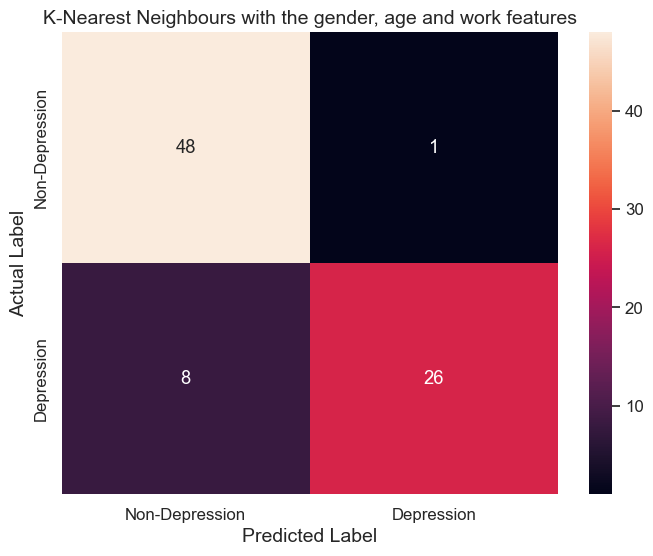

In [71]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("K-Nearest Neighbours with the gender, age and work features", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 48, True Negative (TN) is 26, False Positive (FP) is 8 and False Negative (FN) is 1.

Out of the 83 predictions, K-Nearest Neighbours has made 74 correct predictions and 9 incorrect predictions when including the gender, age and work features.

**Train the K-Nearest Neighbours model with the gender, age and work features with Leave One Subject Out Cross Validation**

In [72]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [73]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define K-Nearest Neighbours Classifier with 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [74]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the K-Nearest Neighbours model with the gender, age and work features with cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Feature Scaling using Standard Scaler before fitting the KNN model
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Train the K-Nearest Neighbours model using Leave One Subject Out Cross Validation
    knn_clf.fit(X_train_scaled, y_train)
    
    # Predict the class for the independent variables
    y_pred = knn_clf.predict(X_test_scaled)
    
    # Accuracy score for K-Nearest Neighbours
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score K-Nearest Neighbours
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for K-Nearest Neighbours
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for K-Nearest Neighbours
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for K-Nearest Neighbours
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    
print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for K-Nearest Neighbours
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for K-Nearest Neighbours
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for K-Nearest Neighbours
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for K-Nearest Neighbours
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for K-Nearest Neighbours
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.5, 0.2, 0.3333333333333333, 0.0, 0.14285714285714285, 0.16666666666666666, 0.3333333333333333, 0.0, 0.2, 0.4, 0.4, 0.0, 0.0, 0.2, 0.8333333333333334, 0.25, 0.16666666666666666, 0.2, 0.2, 0.2, 0.0, 0.4, 0.4, 0.7142857142857143, 1.0, 0.8333333333333334, 0.8888888888888888, 0.8333333333333334, 1.0, 1.0, 0.6666666666666666, 0.875, 0.8333333333333334, 1.0, 0.75, 0.875, 1.0, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 0.6666666666666666, 0.8888888888888888, 0.6, 0.5, 0.6666666666666666, 0.7222222222222222, 1.0, 0.7857142857142857, 0.8571428571428571, 1.0, 0.5384615384615384, 0.7857142857142857, 0.35714285714285715, 1.0, 1.0]
Precision: [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [0.5, 0.2, 0.3333333333333333, 0.0, 0.14285714285

Using the Leave One Subject Out Cross Validation, the K-Nearest Neighbours model has a mean accuracy of 0.5726906426906427 (57.26%) when including the gender, age and work features

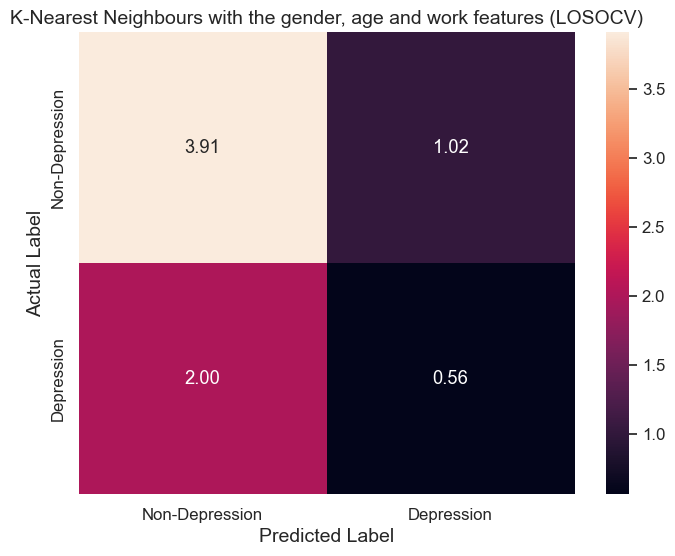

In [75]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of K-Nearest Neighbours with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "K-Nearest Neighbours with the gender, age and work features (LOSOCV)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 3.91, True Negative (TN) is 0.56, False Positive (FP) is 2.00 and False Negative (FN) is 1.02.

On an average of 7.49 predictions, K-Nearest Neighbours has made an average of 4.47 correct predictions and an average of 3.02 incorrect predictions when including the gender, age and work features.

**Train the K-Nearest Neighbours model with all the temporal features without Leave One Subject Out Cross Validation**

In [76]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [77]:
'''
Train the K-Nearest Neighbours model without the gender, age and work features without cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [78]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0


In [80]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0


In [81]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [82]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [83]:
# Feature Scaling using Standard Scaler before fitting the KNN model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the K-Nearest Neighbours model - use 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [84]:
# Predict the class for the independent variables
y_pred = knn_clf.predict(X_test_scaled)

In [85]:
# Evaluation metric results for K-Nearest Neighbours without the gender, age and work features without cross validation

# Accuracy score for K-Nearest Neighbours
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for K-Nearest Neighbours
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for K-Nearest Neighbours
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for K-Nearest Neighbours
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for K-Nearest Neighbours
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.7228915662650602
Precision:  0.7391304347826086
Recall:  0.5
F1 Score:  0.5964912280701754
Balanced Accuracy:  0.6887755102040816


When training the K-Nearest Neighbours model without the gender, age and work features, it produced an accuracy score of 0.7228915662650602 (72.28%)

In [86]:
# Confusion matrix for the K-Nearest Neighbours model without the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[43,  6],
       [17, 17]], dtype=int64)

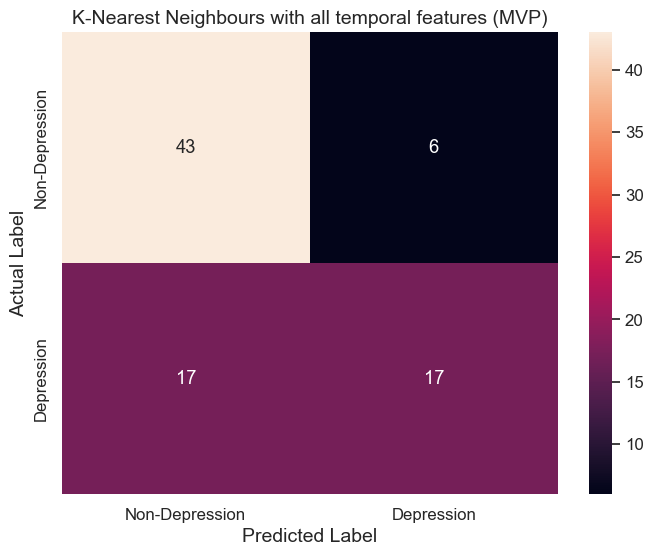

In [87]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("K-Nearest Neighbours with all temporal features (MVP)", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 43, True Negative (TN) is 17, False Positive (FP) is 17 and False Negative (FN) is 6.

Out of the 83 predictions, K-Nearest Neighbours has made 60 correct predictions and 23 incorrect predictions when removing the gender, age and work features.

**Train the K-Nearest Neighbours model with all temporal features with Leave One Subject Out Cross Validation**

In [88]:
# Load new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [89]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define K-Nearest Neighbours Classifier with 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [90]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the K-Nearest Neighbours model without the gender, age and work features with cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Feature Scaling using Standard Scaler before fitting the KNN model
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Train the K-Nearest Neighbours model using Leave One Subject Out Cross Validation
    knn_clf.fit(X_train_scaled, y_train)
    
    # Predict the class for the independent variables
    y_pred = knn_clf.predict(X_test_scaled)
    
    # Accuracy score for K-Nearest Neighbours
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score K-Nearest Neighbours
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for K-Nearest Neighbours
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for K-Nearest Neighbours
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for K-Nearest Neighbours
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for K-Nearest Neighbours
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for K-Nearest Neighbours
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for K-Nearest Neighbours
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for K-Nearest Neighbours
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for K-Nearest Neighbours
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.3333333333333333, 0.2, 0.5, 0.0, 0.14285714285714285, 0.3333333333333333, 0.3333333333333333, 0.18181818181818182, 0.2, 0.6, 0.4, 0.1, 0.2857142857142857, 0.2, 0.8333333333333334, 0.375, 0.6666666666666666, 0.4, 0.2, 0.2, 0.16666666666666666, 0.4, 0.4, 0.7142857142857143, 0.8333333333333334, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 0.3333333333333333, 0.625, 0.8333333333333334, 0.8571428571428571, 0.625, 0.875, 0.875, 0.6666666666666666, 0.8333333333333334, 0.5, 0.6666666666666666, 0.8888888888888888, 0.6, 0.3333333333333333, 0.5, 0.2777777777777778, 0.8333333333333334, 0.2857142857142857, 0.2857142857142857, 0.875, 0.38461538461538464, 0.5, 0.35714285714285715, 0.875, 0.875]
Precision: [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Using the Leave One Subject Out Cross Validation, the K-Nearest Neighbours model has a mean accuracy of 0.5152627170808989 (51.52%) when removing the gender, age and work features

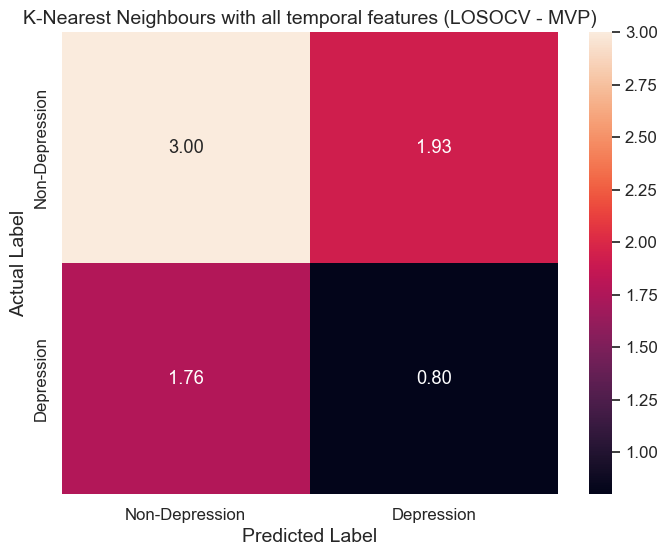

In [91]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of K-Nearest Neighbours without the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "K-Nearest Neighbours with all temporal features (LOSOCV - MVP)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 3.00, True Negative (TN) is 0.80, False Positive (FP) is 1.76 and False Negative (FN) is 1.93.

On an average of 7.49 predictions, K-Nearest Neighbours has made an average of 3.80 correct predictions and an average of 3.69 incorrect predictions when removing the gender, age and work features.

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 3.96, True Negative (TN) is 0.71, False Positive (FP) is 1.85 and False Negative (FN) is 0.96.

On an average of 7.49 predictions, Support Vector Machine has made an average of 4.67 correct predictions and an average of 2.81 incorrect predictions when removing the gender, age and work features.

**Train the K-Nearest Neighbours model with the relevant features without Leave One Subject Out Cross Validation**

In [92]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [93]:
'''
Train the K-Nearest Neighbours model with the relevant temporal features without cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [94]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
5,492290.0,6.062835e+08,6.0,487.0,121.0,645.0,0.018246,575.0
45,648569.5,4.581578e+08,18.0,507.0,153.0,679.0,-0.006847,533.0
401,872964.0,6.590095e+08,16.0,515.0,115.0,600.0,-0.103752,239.0
392,10719.0,3.216600e+04,0.0,6.0,0.0,5.0,-0.000011,26.0
118,633344.5,5.015080e+08,25.0,648.0,142.0,795.0,0.029176,636.0
...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,47.0,638.0,153.0,752.0,-0.073749,0.0
106,978368.5,7.963274e+08,40.0,633.0,145.0,738.0,0.010696,0.0
270,1394837.5,1.431363e+09,62.0,592.0,152.0,709.0,-0.079600,364.0
348,712683.5,7.299986e+08,18.0,501.0,160.0,675.0,-0.021857,557.0


In [96]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
272,1022557.5,849923175.0,56.0,619.0,137.0,735.0,-0.035562,362.0
55,337284.0,123815164.0,28.0,641.0,134.0,801.0,0.001700,640.0
238,917475.0,687391684.0,35.0,581.0,123.0,716.0,-0.058945,499.0
33,320557.0,172586793.0,0.0,349.0,112.0,551.0,-0.011008,607.0
286,950733.0,793662601.0,68.0,721.0,149.0,838.0,-0.017848,428.0
...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,0.0,21.0,0.0,18.0,-0.000033,92.0
198,844099.5,506985620.0,72.0,738.0,144.0,852.0,0.018197,433.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
406,550528.5,327319639.0,27.0,619.0,141.0,776.0,0.007817,673.0


In [97]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [98]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

In [99]:
# Feature Scaling using Standard Scaler before fitting the KNN model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the K-Nearest Neighbours model - use 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [100]:
# Predict the class for the independent variables
y_pred = knn_clf.predict(X_test_scaled)

In [101]:
# Evaluation metric results for K-Nearest Neighbours with relevant temporal features without cross validation

# Accuracy score for K-Nearest Neighbours
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for K-Nearest Neighbours
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for K-Nearest Neighbours
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for K-Nearest Neighbours
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for K-Nearest Neighbours
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.7469879518072289
Precision:  0.782608695652174
Recall:  0.5294117647058824
F1 Score:  0.631578947368421
Balanced Accuracy:  0.7136854741896759


In [102]:
# Confusion matrix for the K-Nearest Neighbours model without the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[44,  5],
       [16, 18]], dtype=int64)

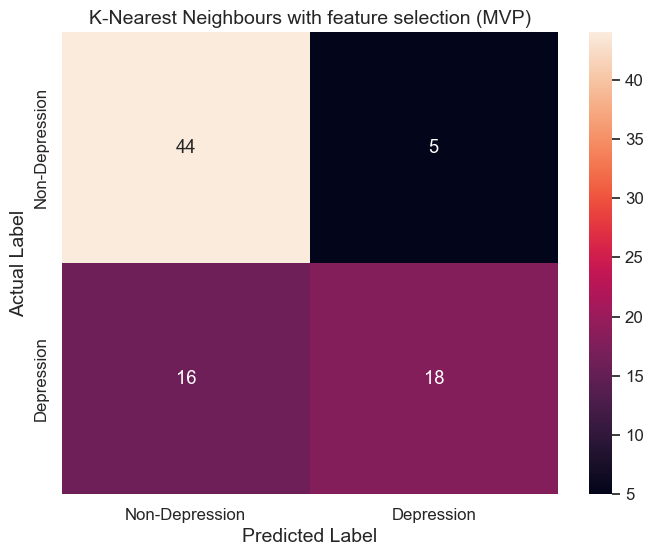

In [103]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("K-Nearest Neighbours with feature selection (MVP)", fontsize=14)

plt.show()

**Train the K-Nearest Neighbours model with the relevant features with Leave One Subject Out Cross Validation**

In [104]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [105]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define K-Nearest Neighbours Classifier with 5 nearest neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [106]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the K-Nearest Neighbours model with the relevant temporal features with cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Feature Scaling using Standard Scaler before fitting the KNN model
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Train the K-Nearest Neighbours model using Leave One Subject Out Cross Validation
    knn_clf.fit(X_train_scaled, y_train)
    
    # Predict the class for the independent variables
    y_pred = knn_clf.predict(X_test_scaled)
    
    # Accuracy score for K-Nearest Neighbours
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score K-Nearest Neighbours
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for K-Nearest Neighbours
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for K-Nearest Neighbours
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for K-Nearest Neighbours
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for K-Nearest Neighbours
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for K-Nearest Neighbours
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for K-Nearest Neighbours
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for K-Nearest Neighbours
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for K-Nearest Neighbours
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.6666666666666666, 0.2, 0.5, 0.0, 0.14285714285714285, 0.3333333333333333, 0.3333333333333333, 0.18181818181818182, 0.6, 0.6, 0.4, 0.3, 0.0, 0.4, 0.8333333333333334, 0.25, 0.16666666666666666, 0.4, 0.4, 0.4, 0.0, 0.4, 0.4, 0.5714285714285714, 0.8333333333333334, 0.6666666666666666, 0.8888888888888888, 0.6666666666666666, 0.8333333333333334, 0.5, 0.5, 0.75, 0.5, 0.8571428571428571, 0.625, 0.875, 0.75, 0.6666666666666666, 0.8333333333333334, 0.6666666666666666, 0.8333333333333334, 0.7777777777777778, 0.6, 0.6666666666666666, 0.5, 0.2222222222222222, 0.6666666666666666, 0.21428571428571427, 0.14285714285714285, 0.875, 0.38461538461538464, 0.35714285714285715, 0.35714285714285715, 1.0, 1.0]
Precision: [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recal

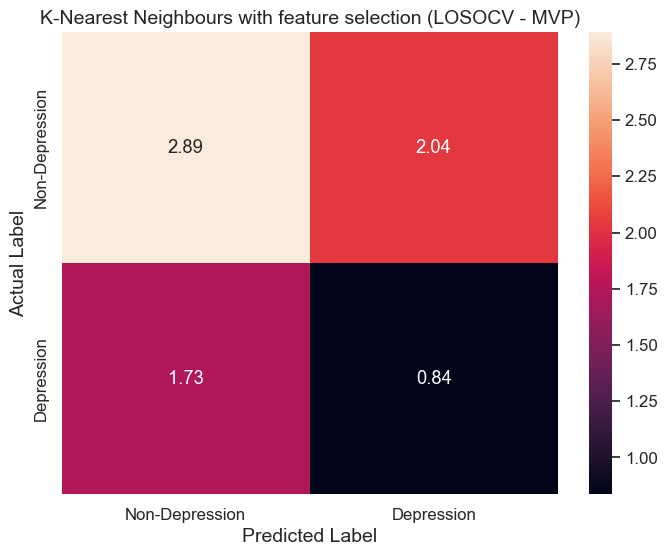

In [107]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of K-Nearest Neighbours with feature selection with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "K-Nearest Neighbours with feature selection (LOSOCV - MVP)")

#### Decision Tree

The third machine learning model that will be used to train the dataset is Decision Tree. We will train the Decision Tree model with the gender, age and work features and then train the Decision Tree model without those features. This will be done without cross validation first and then with cross validation.

**Train the Decision Tree model with the gender, age and work features without Leave One Subject Out Cross Validation**

In [108]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [109]:
'''
Train the Decision Tree model with the gender, age and work features without cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [110]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0,2,3,2.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0,1,5,2.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0,2,4,1.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0,1,0,1.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0,2,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0,2,4,2.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0,1,5,2.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0,1,3,1.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0,1,1,1.0


In [112]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0,1,3,1.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0,1,6,2.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0,1,6,1.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0,1,8,2.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0,2,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0,2,1,1.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0,2,4,1.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0,1,2,2.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0,2,2,1.0


In [113]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [114]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [115]:
# Train Decision Tree with the gender, age and work features without cross validation
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [116]:
# Predict the class for the independent variables
y_pred = dt_clf.predict(X_test)

In [117]:
# Evaluation metric results for Decision Tree with the gender, age and work features without cross validation

# Accuracy score for Decision Tree
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Decision Tree
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Decision Tree
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Decision Tree
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Decision Tree
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.891566265060241
Precision:  0.8571428571428571
Recall:  0.8823529411764706
F1 Score:  0.8695652173913043
Balanced Accuracy:  0.89015606242497


When training the Decision Tree model with the gender, age and work features, it produced an accuracy score of 0.891566265060241 (89.15%)

In [118]:
# Confusion matrix for the Decision Tree model with the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[44,  5],
       [ 4, 30]], dtype=int64)

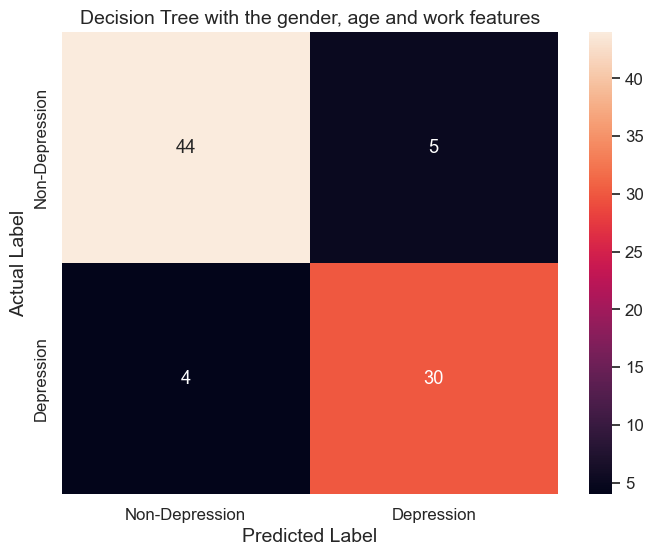

In [119]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("Decision Tree with the gender, age and work features", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 44, True Negative (TN) is 30, False Positive (FP) is 4 and False Negative (FN) is 5.

Out of the 83 predictions, Decision Tree has made 74 correct predictions and 9 incorrect predictions when including the gender, age and work features.

**Train the Decision Tree model with the gender, age and work features with Leave One Subject Out Cross Validation**

In [120]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [121]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

In [122]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the Decision Tree model with the gender, age and work features with cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Decision Tree model using Leave One Subject Out Cross Validation
    dt_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = dt_clf.predict(X_test)
    
    # Accuracy score for Decision Tree
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Decision Tree
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Decision Tree
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Decision Tree
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Decision Tree
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Decision Tree
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Decision Tree
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Decision Tree
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Decision Tree
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Decision Tree
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [1.0, 1.0, 1.0, 0.8333333333333334, 1.0, 1.0, 0.3333333333333333, 0.8181818181818182, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.3333333333333333, 0.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.1111111111111111, 0.5, 1.0, 1.0, 0.8333333333333334, 1.0, 0.8333333333333334, 1.0, 1.0, 0.875, 1.0, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.16666666666666666, 1.0, 0.16666666666666666, 0.5714285714285714, 0.0, 0.875, 0.9230769230769231, 1.0, 0.35714285714285715, 1.0, 0.75]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [1.0, 1.0, 1.0, 0.8333333333333334, 1.0, 1.0, 0.3333333333333333, 0.8181818181818182, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.3333333333333333, 0.0, 

Using the Leave One Subject Out Cross Validation, the Decision Tree model has a mean accuracy of 0.7984413566231747 (79.84%) when including the gender, age and work features

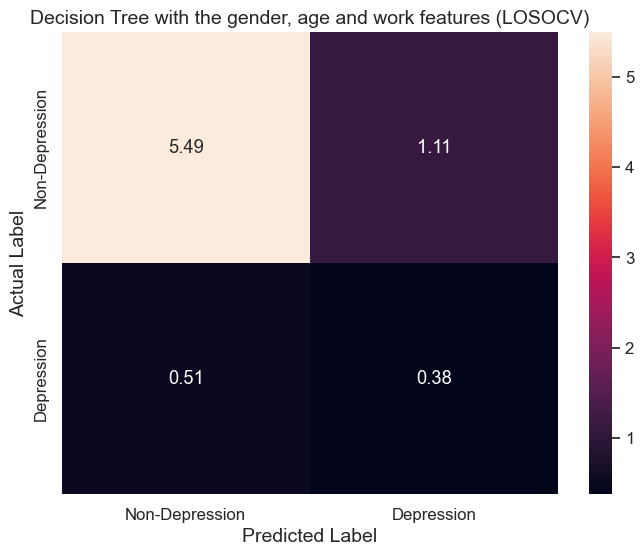

In [123]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Decision Tree with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "Decision Tree with the gender, age and work features (LOSOCV)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 5.49, True Negative (TN) is 0.38, False Positive (FP) is 0.51 and False Negative (FN) is 1.11.

On an average of 7.49 predictions, Decision Tree has made an average of 5.87 correct predictions and an average of 1.62 incorrect predictions when including the gender, age and work features.

**Train the Decision Tree model with all temporal features without Leave One Subject Out Cross Validation**

In [124]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [125]:
'''
Train the Decision Tree model without the gender, age and work features without cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [126]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0


In [128]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0


In [129]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [130]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [131]:
# Train the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [132]:
# Predict the class for the independent variables
y_pred = dt_clf.predict(X_test)

In [133]:
# Evaluation metric results for Decision Tree without the gender, age and work features without cross validation

# Accuracy score for Decision Tree
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Decision Tree
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Decision Tree
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Decision Tree
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Decision Tree
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6867469879518072
Precision:  0.625
Recall:  0.5882352941176471
F1 Score:  0.6060606060606061
Balanced Accuracy:  0.6716686674669867


When training the Decision Tree model without the gender, age and work features, it produced an accuracy score of 0.6867469879518072 (68.67%)

In [134]:
# Confusion matrix for the Decision Tree model without the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[37, 12],
       [14, 20]], dtype=int64)

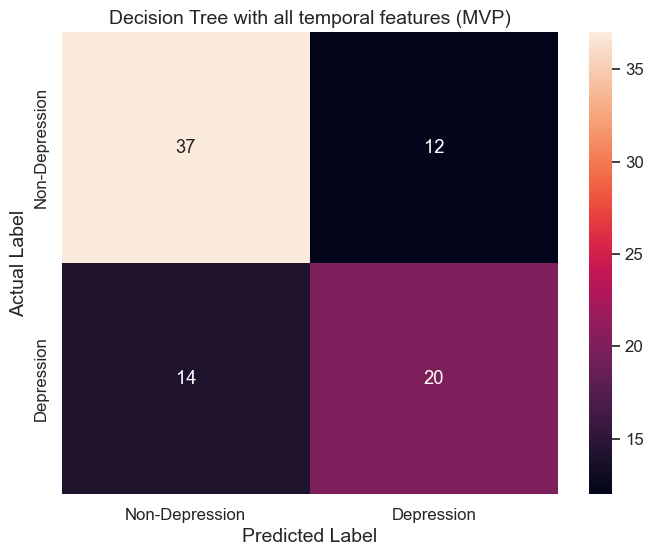

In [135]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("Decision Tree with all temporal features (MVP)", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 37, True Negative (TN) is 20, False Positive (FP) is 14 and False Negative (FN) is 12.

Out of the 83 predictions, Decision Tree has made 57 correct predictions and 26 incorrect predictions when removing the gender, age and work features.

**Train the Decision Tree model with all temporal features with Leave One Subject Out Cross Validation**

In [136]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [137]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

In [138]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the Decision Tree model without the gender, age and work features with cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Decision Tree model using Leave One Subject Out Cross Validation
    dt_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = dt_clf.predict(X_test)
    
    # Accuracy score for Decision Tree
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Decision Tree
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Decision Tree
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Decision Tree
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Decision Tree
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Decision Tree
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Decision Tree
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Decision Tree
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Decision Tree
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Decision Tree
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.3333333333333333, 0.4, 0.3333333333333333, 0.8333333333333334, 0.42857142857142855, 0.8333333333333334, 0.5, 0.18181818181818182, 1.0, 1.0, 0.6, 0.4, 0.5714285714285714, 1.0, 0.3333333333333333, 0.5, 0.3333333333333333, 0.4, 0.6, 0.0, 0.5, 0.8, 0.8, 0.7857142857142857, 1.0, 0.6666666666666666, 0.6666666666666666, 0.5, 1.0, 0.8333333333333334, 0.8333333333333334, 0.25, 1.0, 0.7142857142857143, 0.875, 0.875, 0.875, 0.16666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 0.9285714285714286, 0.6428571428571429, 0.625, 0.9230769230769231, 1.0, 0.8571428571428571, 1.0, 0.5]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [0.3333333333333333, 0.4, 0.3333333333333333, 0.8333333333333334, 0.428571428

Using the Leave One Subject Out Cross Validation, the Decision Tree model has a mean accuracy of 0.6969721187903005 (69.69%) when removing the gender, age and work features

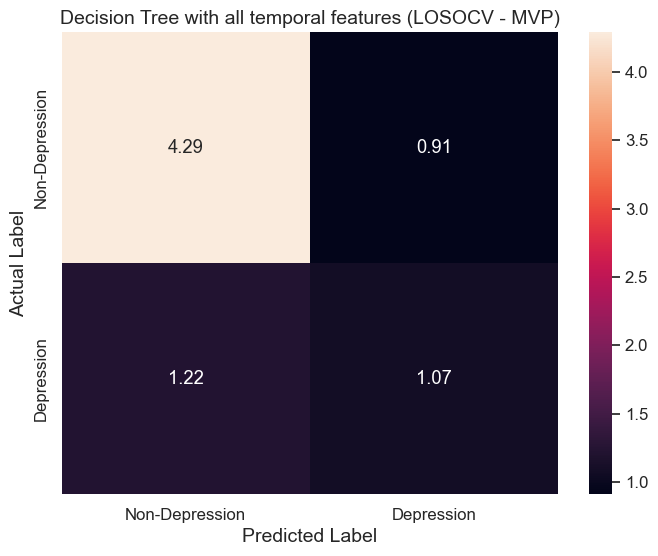

In [139]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Decision Tree without the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "Decision Tree with all temporal features (LOSOCV - MVP)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 4.29, True Negative (TN) is 1.07, False Positive (FP) is 1.22 and False Negative (FN) is 0.91.

On an average of 7.49 predictions, Decision Tree has made an average of 5.36 correct predictions and an average of 2.13 incorrect predictions when removing the gender, age and work features.

**Train the Decision Tree model with the relevant features without Leave One Subject Out Cross Validation**

In [140]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [141]:
'''
Train the Decision Tree model with the relevant temporal features without cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [142]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
5,492290.0,6.062835e+08,6.0,487.0,121.0,645.0,0.018246,575.0
45,648569.5,4.581578e+08,18.0,507.0,153.0,679.0,-0.006847,533.0
401,872964.0,6.590095e+08,16.0,515.0,115.0,600.0,-0.103752,239.0
392,10719.0,3.216600e+04,0.0,6.0,0.0,5.0,-0.000011,26.0
118,633344.5,5.015080e+08,25.0,648.0,142.0,795.0,0.029176,636.0
...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,47.0,638.0,153.0,752.0,-0.073749,0.0
106,978368.5,7.963274e+08,40.0,633.0,145.0,738.0,0.010696,0.0
270,1394837.5,1.431363e+09,62.0,592.0,152.0,709.0,-0.079600,364.0
348,712683.5,7.299986e+08,18.0,501.0,160.0,675.0,-0.021857,557.0


In [144]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
272,1022557.5,849923175.0,56.0,619.0,137.0,735.0,-0.035562,362.0
55,337284.0,123815164.0,28.0,641.0,134.0,801.0,0.001700,640.0
238,917475.0,687391684.0,35.0,581.0,123.0,716.0,-0.058945,499.0
33,320557.0,172586793.0,0.0,349.0,112.0,551.0,-0.011008,607.0
286,950733.0,793662601.0,68.0,721.0,149.0,838.0,-0.017848,428.0
...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,0.0,21.0,0.0,18.0,-0.000033,92.0
198,844099.5,506985620.0,72.0,738.0,144.0,852.0,0.018197,433.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
406,550528.5,327319639.0,27.0,619.0,141.0,776.0,0.007817,673.0


In [145]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [146]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

In [147]:
# Train the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [148]:
# Predict the class for the independent variables
y_pred = dt_clf.predict(X_test)

In [149]:
# Evaluation metric results for Decision Tree with relevant features without cross validation

# Accuracy score for Decision Tree
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Decision Tree
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Decision Tree
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Decision Tree
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Decision Tree
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6626506024096386
Precision:  0.5882352941176471
Recall:  0.5882352941176471
F1 Score:  0.5882352941176471
Balanced Accuracy:  0.6512605042016807


In [150]:
# Confusion matrix for the Decision Tree model with relevant temporal features
confusion_matrix(y_test, y_pred)

array([[35, 14],
       [14, 20]], dtype=int64)

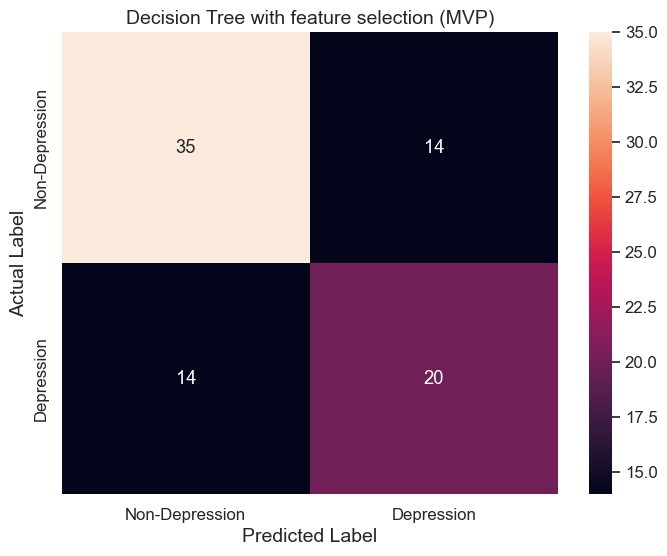

In [151]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("Decision Tree with feature selection (MVP)", fontsize=14)

plt.show()

**Train the Decision Tree model with the relevant features with Leave One Subject Out Cross Validation**

In [152]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [153]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

In [154]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the Decision Tree model with the relevant temporal features with cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Decision Tree model using Leave One Subject Out Cross Validation
    dt_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = dt_clf.predict(X_test)
    
    # Accuracy score for Decision Tree
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Decision Tree
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Decision Tree
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Decision Tree
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Decision Tree
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Decision Tree
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Decision Tree
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Decision Tree
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Decision Tree
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Decision Tree
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.16666666666666666, 0.8, 0.6666666666666666, 0.6666666666666666, 0.42857142857142855, 0.8333333333333334, 0.3333333333333333, 0.2727272727272727, 1.0, 1.0, 0.6, 0.4, 0.7142857142857143, 1.0, 0.5, 0.375, 0.3333333333333333, 0.4, 0.4, 0.0, 0.5, 0.6, 1.0, 0.9285714285714286, 0.6666666666666666, 0.5, 0.6666666666666666, 0.3333333333333333, 0.8333333333333334, 1.0, 0.8333333333333334, 0.375, 1.0, 0.8571428571428571, 0.875, 0.75, 0.75, 0.16666666666666666, 0.8333333333333334, 0.6666666666666666, 1.0, 0.8888888888888888, 0.8, 0.6666666666666666, 1.0, 0.8888888888888888, 1.0, 0.8571428571428571, 0.6428571428571429, 0.5, 0.8461538461538461, 1.0, 0.8571428571428571, 1.0, 0.5]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [0.166666666666666

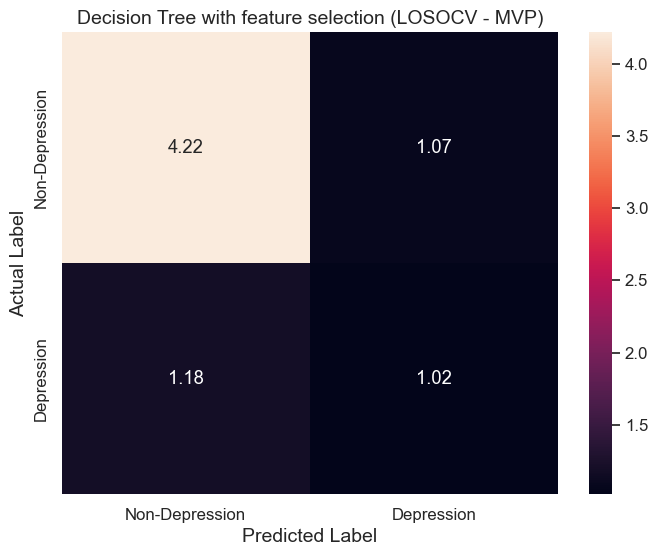

In [155]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Decision Tree without the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "Decision Tree with feature selection (LOSOCV - MVP)")

#### Na&iuml;ve Bayes

The fourth machine learning model that will be used to train the dataset is Na&iuml;ve Bayes. We will train the Na&iuml;ve Bayes model with the gender, age and work features and then train the Na&iuml;ve Bayes model without those features. This will be done without cross validation first and then with cross validation.

**Train the Na&iuml;ve Bayes model with the gender, age and work features without Leave One Subject Out Cross Validation**

In [156]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [157]:
'''
Train the Naive Bayes model with the gender, age and work features without cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [158]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0,2,3,2.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0,1,5,2.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0,2,4,1.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0,1,0,1.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0,2,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0,2,4,2.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0,1,5,2.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0,1,3,1.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0,1,1,1.0


In [160]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0,1,3,1.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0,1,6,2.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0,1,6,1.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0,1,8,2.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0,2,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0,2,1,1.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0,2,4,1.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0,1,2,2.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0,2,2,1.0


In [161]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [162]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [163]:
# Train Naive Bayes with the gender, age and work features without cross validation
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model - use Gaussian Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [164]:
# Predict the class for the independent variables
y_pred = gnb_clf.predict(X_test)

In [165]:
# Evaluation metric results for Naive Bayes with the gender, age and work features without cross validation

# Accuracy score for Naive Bayes
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Naive Bayes
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Naive Bayes
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Naive Bayes
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Naive Bayes
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6746987951807228
Precision:  0.5945945945945946
Recall:  0.6470588235294118
F1 Score:  0.619718309859155
Balanced Accuracy:  0.67046818727491


When training the Na&iuml;ve Bayes model with the gender, age and work features, it produced an accuracy score of 0.6746987951807228 (67.46%)

In [166]:
# Confusion matrix for the Naive Bayes model with the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[34, 15],
       [12, 22]], dtype=int64)

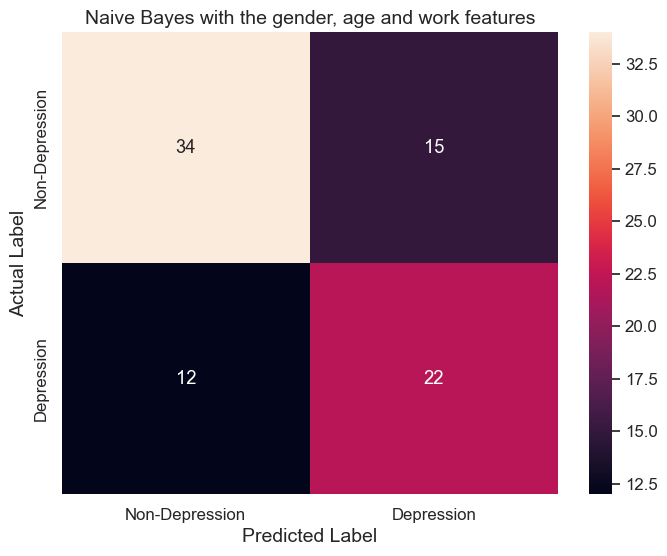

In [167]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("Naive Bayes with the gender, age and work features", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 34, True Negative (TN) is 22, False Positive (FP) is 12 and False Negative (FN) is 15.

Out of the 83 predictions, Na&iuml;ve Bayes has made 56 correct predictions and 27 incorrect predictions when including the gender, age and work features.

**Train the Na&iuml;ve Bayes model with the gender, age and work features with Leave One Subject Out Cross Validation**

In [168]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [169]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Naive Bayes Classifier - use Gaussian Naive Bayes
gnb_clf = GaussianNB()

In [171]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the Naive Bayes model with the gender, age and work features with cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Naive Bayes model using Leave One Subject Out Cross Validation
    gnb_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = gnb_clf.predict(X_test)
    
    # Accuracy score for Naive Bayes
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Naive Bayes
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Naive Bayes
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Naive Bayes
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Naive Bayes
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Naive Bayes
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Naive Bayes
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Naive Bayes
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Naive Bayes
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Naive Bayes
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [1.0, 0.0, 1.0, 0.8333333333333334, 0.2857142857142857, 0.6666666666666666, 1.0, 0.45454545454545453, 1.0, 1.0, 1.0, 0.6, 0.7142857142857143, 1.0, 1.0, 0.375, 0.6666666666666666, 0.4, 1.0, 1.0, 0.16666666666666666, 0.6, 1.0, 0.6428571428571429, 0.6666666666666666, 0.0, 0.3333333333333333, 0.0, 1.0, 0.6666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.14285714285714285, 1.0, 0.875, 0.5, 0.3333333333333333, 0.0, 0.8333333333333334, 0.6666666666666666, 1.0, 0.8, 1.0, 0.6666666666666666, 0.8333333333333334, 0.0, 0.9285714285714286, 0.5714285714285714, 0.5, 0.9230769230769231, 0.8571428571428571, 0.9285714285714286, 0.875, 0.25]
Precision: [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [1.0, 0.0, 1.0, 0.8333333333333334, 0.28571428571

Using the Leave One Subject Out Cross Validation, the Na&iuml;ve Bayes model has a mean accuracy of 0.6555888051342597 (65.55%) when including the gender, age and work features

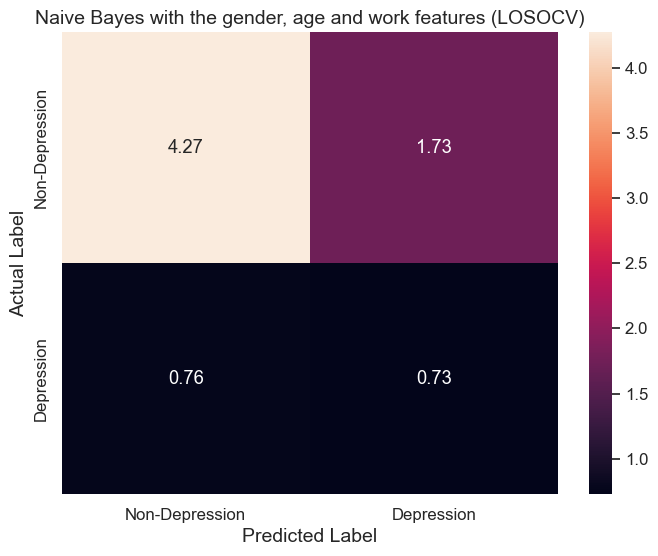

In [172]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Naive Bayes with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "Naive Bayes with the gender, age and work features (LOSOCV)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 4.27, True Negative (TN) is 0.73, False Positive (FP) is 0.76 and False Negative (FN) is 1.73.

On an average of 7.49 predictions, Na&iuml;ve Bayes has made an average of 5 correct predictions and an average of 2.49 incorrect predictions when including the gender, age and work features.

**Train the Na&iuml;ve Bayes model with all temporal features without Leave One Subject Out Cross Validation**

In [173]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [174]:
'''
Train the Naive Bayes model without the gender, age and work features without cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [175]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0


In [177]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0


In [178]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [179]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [180]:
# Train the Naive Bayes model - use Gaussian Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [181]:
# Predict the class for the independent variables
y_pred = gnb_clf.predict(X_test)

In [182]:
# Evaluation metric results for Naive Bayes without the gender, age and work features without cross validation

# Accuracy score for Naive Bayes
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Naive Bayes
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Naive Bayes
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Naive Bayes
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Naive Bayes
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6746987951807228
Precision:  0.5945945945945946
Recall:  0.6470588235294118
F1 Score:  0.619718309859155
Balanced Accuracy:  0.67046818727491


When training the Na&iuml;ve Bayes model without the gender, age and work features, it produced an accuracy score of 0.6746987951807228 (67.46%)

In [183]:
# Confusion matrix for the Naive Bayes model without the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[34, 15],
       [12, 22]], dtype=int64)

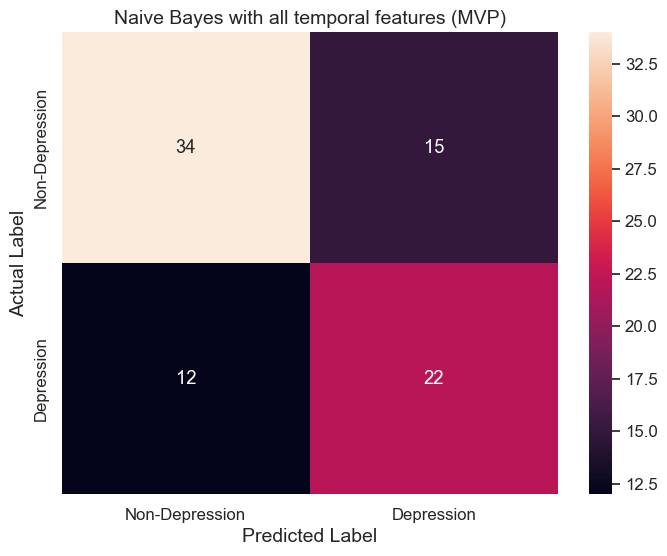

In [184]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("Naive Bayes with all temporal features (MVP)", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 34, True Negative (TN) is 22, False Positive (FP) is 12 and False Negative (FN) is 15.

Out of the 83 predictions, Na&iuml;ve Bayes has made 56 correct predictions and 27 incorrect predictions when removing the gender, age and work features.

**Train the Na&iuml;ve Bayes model with all temporal features with Leave One Subject Out Cross Validation**

In [185]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [186]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Naive Bayes Classifier - use Gaussian Naive Bayes
gnb_clf = GaussianNB()

In [187]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the Naive Bayes model without the gender, age and work features with cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Naive Bayes model using Leave One Subject Out Cross Validation
    gnb_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = gnb_clf.predict(X_test)
    
    # Accuracy score for Naive Bayes
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Naive Bayes
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Naive Bayes
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Naive Bayes
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Naive Bayes
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Naive Bayes
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Naive Bayes
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Naive Bayes
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Naive Bayes
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Naive Bayes
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [1.0, 0.0, 1.0, 0.8333333333333334, 0.2857142857142857, 0.6666666666666666, 1.0, 0.45454545454545453, 1.0, 1.0, 1.0, 0.6, 0.7142857142857143, 1.0, 1.0, 0.375, 0.6666666666666666, 0.4, 1.0, 1.0, 0.16666666666666666, 0.6, 1.0, 0.6428571428571429, 0.6666666666666666, 0.0, 0.3333333333333333, 0.0, 1.0, 0.6666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.14285714285714285, 1.0, 0.875, 0.5, 0.3333333333333333, 0.0, 0.8333333333333334, 0.6666666666666666, 1.0, 0.8, 1.0, 0.6666666666666666, 0.8333333333333334, 0.0, 0.9285714285714286, 0.5714285714285714, 0.5, 0.9230769230769231, 0.8571428571428571, 0.9285714285714286, 0.875, 0.25]
Precision: [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [1.0, 0.0, 1.0, 0.8333333333333334, 0.28571428571

Using the Leave One Subject Out Cross Validation, the Na&iuml;ve Bayes model has a mean accuracy of 0.6555888051342597 (65.55%) when removing the gender, age and work features

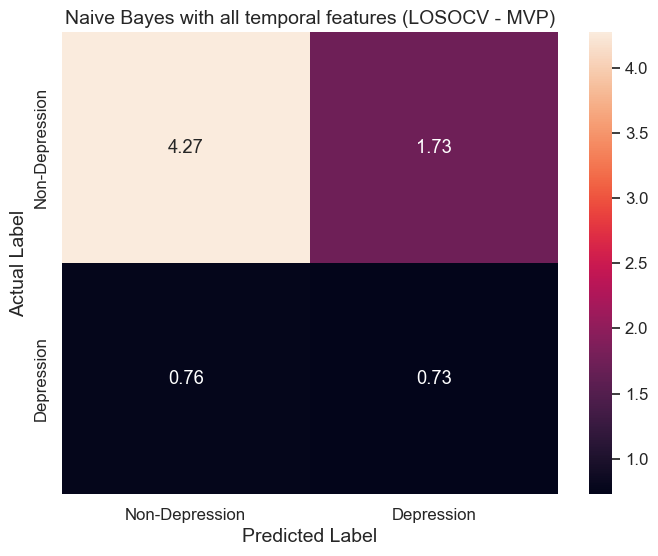

In [188]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Naive Bayes with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "Naive Bayes with all temporal features (LOSOCV - MVP)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 4.27, True Negative (TN) is 0.73, False Positive (FP) is 0.76 and False Negative (FN) is 1.73.

On an average of 7.49 predictions, Na&iuml;ve Bayes has made an average of 5 correct predictions and an average of 2.49 incorrect predictions when removing the gender, age and work features.

**Train the Na&iuml;ve Bayes model with the relevant features without Leave One Subject Out Cross Validation**

In [189]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [190]:
'''
Train the Naive Bayes model with the relevant temporal features without cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [191]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
5,492290.0,6.062835e+08,6.0,487.0,121.0,645.0,0.018246,575.0
45,648569.5,4.581578e+08,18.0,507.0,153.0,679.0,-0.006847,533.0
401,872964.0,6.590095e+08,16.0,515.0,115.0,600.0,-0.103752,239.0
392,10719.0,3.216600e+04,0.0,6.0,0.0,5.0,-0.000011,26.0
118,633344.5,5.015080e+08,25.0,648.0,142.0,795.0,0.029176,636.0
...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,47.0,638.0,153.0,752.0,-0.073749,0.0
106,978368.5,7.963274e+08,40.0,633.0,145.0,738.0,0.010696,0.0
270,1394837.5,1.431363e+09,62.0,592.0,152.0,709.0,-0.079600,364.0
348,712683.5,7.299986e+08,18.0,501.0,160.0,675.0,-0.021857,557.0


In [193]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
272,1022557.5,849923175.0,56.0,619.0,137.0,735.0,-0.035562,362.0
55,337284.0,123815164.0,28.0,641.0,134.0,801.0,0.001700,640.0
238,917475.0,687391684.0,35.0,581.0,123.0,716.0,-0.058945,499.0
33,320557.0,172586793.0,0.0,349.0,112.0,551.0,-0.011008,607.0
286,950733.0,793662601.0,68.0,721.0,149.0,838.0,-0.017848,428.0
...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,0.0,21.0,0.0,18.0,-0.000033,92.0
198,844099.5,506985620.0,72.0,738.0,144.0,852.0,0.018197,433.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
406,550528.5,327319639.0,27.0,619.0,141.0,776.0,0.007817,673.0


In [194]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [195]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

In [196]:
# Train the Naive Bayes model - use Gaussian Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [197]:
# Predict the class for the independent variables
y_pred = gnb_clf.predict(X_test)

In [198]:
# Evaluation metric results for Naive Bayes with relevant temporal features without cross validation

# Accuracy score for Naive Bayes
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for Naive Bayes
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for Naive Bayes
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for Naive Bayes
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for Naive Bayes
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6506024096385542
Precision:  0.5806451612903226
Recall:  0.5294117647058824
F1 Score:  0.5538461538461539
Balanced Accuracy:  0.6320528211284514


In [199]:
# Confusion matrix for the Naive Bayes model with relevant temporal features
confusion_matrix(y_test, y_pred)

array([[36, 13],
       [16, 18]], dtype=int64)

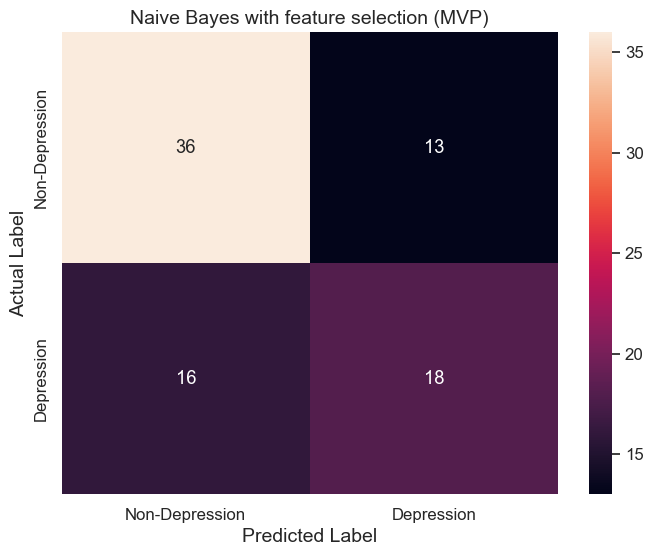

In [200]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("Naive Bayes with feature selection (MVP)", fontsize=14)

plt.show()

**Train the Na&iuml;ve Bayes model with the relevant features with Leave One Subject Out Cross Validation**

In [201]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [202]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define Naive Bayes Classifier - use Gaussian Naive Bayes
gnb_clf = GaussianNB()

In [203]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the Naive Bayes model with the relevant temporal features with cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Naive Bayes model using Leave One Subject Out Cross Validation
    gnb_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = gnb_clf.predict(X_test)
    
    # Accuracy score for Naive Bayes
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for Naive Bayes
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for Naive Bayes
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for Naive Bayes
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for Naive Bayes
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for Naive Bayes
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for Naive Bayes
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for Naive Bayes
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for Naive Bayes
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for Naive Bayes
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.8333333333333334, 0.0, 0.6666666666666666, 0.6666666666666666, 0.14285714285714285, 0.3333333333333333, 0.6666666666666666, 0.36363636363636365, 0.4, 0.0, 0.8, 0.5, 0.0, 0.6, 1.0, 0.25, 0.16666666666666666, 0.4, 0.8, 0.8, 0.16666666666666666, 0.2, 1.0, 0.7857142857142857, 0.8333333333333334, 0.0, 0.3333333333333333, 0.0, 1.0, 0.8333333333333334, 0.3333333333333333, 0.625, 0.8333333333333334, 0.42857142857142855, 1.0, 1.0, 0.625, 0.6666666666666666, 0.16666666666666666, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8333333333333334, 0.5, 1.0, 0.5714285714285714, 0.5, 0.9230769230769231, 1.0, 1.0, 1.0, 0.25]
Precision: [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [0.8333333333333334, 0.0, 0.6666666666666666, 0

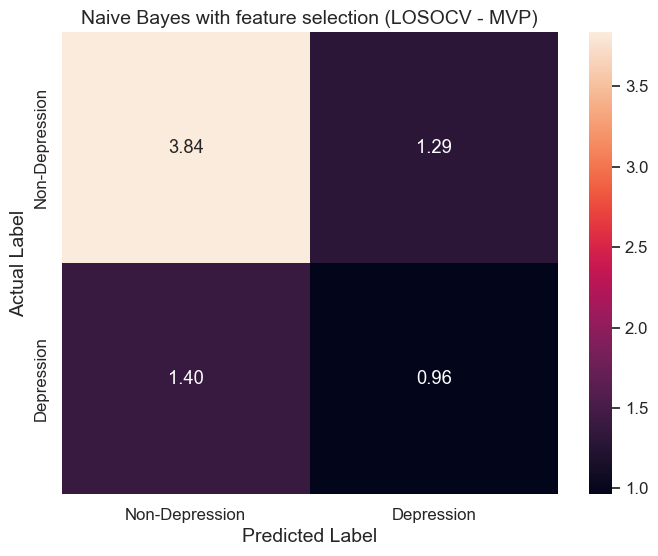

In [204]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of Naive Bayes with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "Naive Bayes with feature selection (LOSOCV - MVP)")

#### AdaBoost

The fifth machine learning model that will be used to train the dataset is AdaBoost. We will train the AdaBoost model with the gender, age and work features and then train the AdaBoost model without those features. This will be done without cross validation first and then with cross validation.

**Train the AdaBoost model with the gender, age and work features without Leave One Subject Out Cross Validation**

In [205]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [206]:
'''
Train the AdaBoost with the gender, age and work features without cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [207]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0,2,3,2.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0,1,5,2.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0,2,4,1.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0,1,0,1.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0,2,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0,2,4,2.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0,1,5,2.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0,1,3,1.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0,1,1,1.0


In [209]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0,1,3,1.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0,1,6,2.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0,1,6,1.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0,1,8,2.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0,2,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0,2,1,1.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0,2,4,1.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0,1,2,2.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0,2,2,1.0


In [210]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [211]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [212]:
# Train AdaBoost with the gender, age and work features without cross validation
from sklearn.ensemble import AdaBoostClassifier

# Train the AdaBoost model
ab_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

In [213]:
# Predict the class for the independent variables
y_pred = ab_clf.predict(X_test)

In [214]:
# Evaluation metric results for AdaBoost with the gender, age and work features without cross validation

# Accuracy score for AdaBoost
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for AdaBoost
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for AdaBoost
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for AdaBoost
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for AdaBoost
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.8795180722891566
Precision:  0.875
Recall:  0.8235294117647058
F1 Score:  0.8484848484848485
Balanced Accuracy:  0.8709483793517407


When training the AdaBoost model with the gender, age and work features, it produced an accuracy score of 0.8795180722891566 (87.95%)

In [215]:
# Confusion matrix for the AdaBoost model with the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[45,  4],
       [ 6, 28]], dtype=int64)

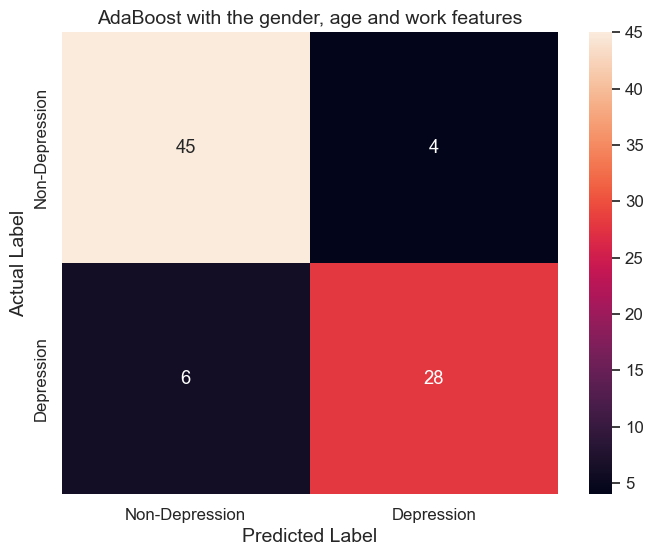

In [216]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("AdaBoost with the gender, age and work features", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 45, True Negative (TN) is 28, False Positive (FP) is 6 and False Negative (FN) is 4.

Out of the 83 predictions, AdaBoost has made 73 correct predictions and 10 incorrect predictions when including the gender, age and work features.

**Train the AdaBoost model with the gender, age and work features with Leave One Subject Out Cross Validation**

In [217]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [218]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define AdaBoost Classifier
ab_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

In [219]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the AdaBoost with the gender, age and work features with cross validation

X - predictors (drop number and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the AdaBoost model using Leave One Subject Out Cross Validation
    ab_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = ab_clf.predict(X_test)
    
    # Accuracy score for AdaBoost
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for AdaBoost
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for AdaBoost
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for AdaBoost
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for AdaBoost
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for AdaBoost
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for AdaBoost
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for AdaBoost
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for AdaBoost
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for AdaBoost
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 0.16666666666666666, 0.6363636363636364, 1.0, 1.0, 1.0, 0.8, 0.8571428571428571, 1.0, 1.0, 0.625, 0.5, 0.0, 1.0, 1.0, 0.0, 0.8, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 0.3333333333333333, 0.2857142857142857, 0.2857142857142857, 0.75, 0.9230769230769231, 1.0, 1.0, 0.75, 0.875]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 0.16666666666666666, 0.6363636363636364, 1.0, 1.0, 1.0, 0.8, 0.8571428571428571, 1.0, 1.0, 0.625, 0.5, 0.0, 1.0, 1.0, 0.0, 0.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Using the Leave One Subject Out Cross Validation, the AdaBoost model has a mean accuracy of 0.8361240274876638 (83.61%) when including the gender, age and work features

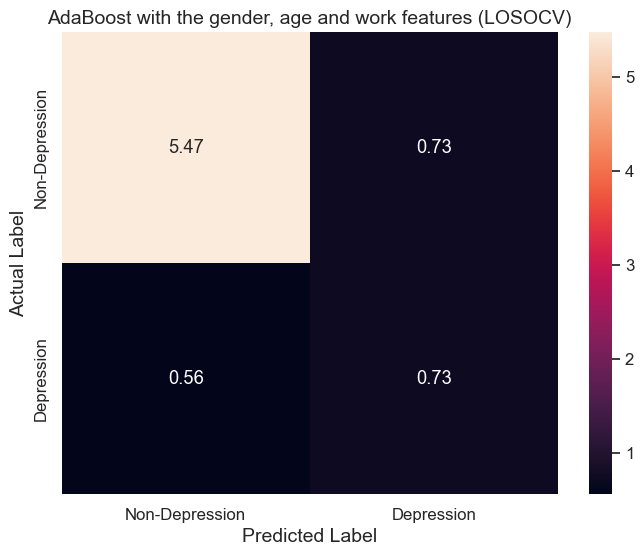

In [220]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of AdaBoost with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "AdaBoost with the gender, age and work features (LOSOCV)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 5.47, True Negative (TN) is 0.73, False Positive (FP) is 0.56 and False Negative (FN) is 0.73.

On an average of 7.49 predictions, AdaBoost has made an average of 6.2 correct predictions and an average of 1.29 incorrect predictions when including the gender, age and work features.

**Train the AdaBoost model with all temporal features without Leave One Subject Out Cross Validation**

In [221]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [222]:
'''
Train the AdaBoost model without the gender, age and work features without cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [223]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
5,492290.0,6.062835e+08,2128.564506,81.284246,0.361211,6.0,0.0,487.0,121.0,645.0,294226.951463,0.018246,292542.0,575.0
45,648569.5,4.581578e+08,1692.335248,104.744929,0.076966,18.0,0.0,507.0,153.0,679.0,378511.567705,-0.006847,376977.0,533.0
401,872964.0,6.590095e+08,1292.898086,119.801612,-0.178939,16.0,0.0,515.0,115.0,600.0,432867.993426,-0.103752,431166.0,239.0
392,10719.0,3.216600e+04,1795.526301,0.021673,0.000000,0.0,0.0,6.0,0.0,5.0,3655.219219,-0.000011,78.0,26.0
118,633344.5,5.015080e+08,2058.203649,98.160322,-0.173659,25.0,0.0,648.0,142.0,795.0,354483.120119,0.029176,353279.0,636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,1195.913121,135.335927,0.156154,47.0,0.0,638.0,153.0,752.0,488153.407290,-0.073749,487074.0,0.0
106,978368.5,7.963274e+08,1948.337292,121.789108,-0.165324,40.0,0.0,633.0,145.0,738.0,439477.501459,0.010696,438319.0,0.0
270,1394837.5,1.431363e+09,1598.311453,176.275354,-0.085857,62.0,0.0,592.0,152.0,709.0,635669.179585,-0.079600,634415.0,364.0
348,712683.5,7.299986e+08,1637.111890,138.686024,0.195888,18.0,0.0,501.0,160.0,675.0,500678.069481,-0.021857,499131.0,557.0


In [225]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
272,1022557.5,849923175.0,1556.246619,162.419839,0.196999,56.0,0.0,619.0,137.0,735.0,585771.446766,-0.035562,584549.0,362.0
55,337284.0,123815164.0,1783.927036,71.145874,0.000000,28.0,0.0,641.0,134.0,801.0,257219.059816,0.001700,256054.0,640.0
238,917475.0,687391684.0,1629.707256,125.852181,-0.053904,35.0,0.0,581.0,123.0,716.0,454225.082418,-0.058945,452942.0,499.0
33,320557.0,172586793.0,1588.202274,58.572381,0.017783,0.0,0.0,349.0,112.0,551.0,212725.543277,-0.011008,210802.0,607.0
286,950733.0,793662601.0,1637.532811,170.202278,0.098916,68.0,0.0,721.0,149.0,838.0,613486.669918,-0.017848,612558.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,1784.169424,0.077799,0.000000,0.0,0.0,21.0,0.0,18.0,3801.102355,-0.000033,280.0,92.0
198,844099.5,506985620.0,1914.689493,138.982217,0.090303,72.0,0.0,738.0,144.0,852.0,501067.869525,0.018197,500197.0,433.0
84,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3599.000000,0.000000,0.0,0.0
406,550528.5,327319639.0,1837.839809,101.572381,0.043623,27.0,0.0,619.0,141.0,776.0,366757.813628,0.007817,365559.0,673.0


In [226]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [227]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

Using 80% training data and 20% test data, we notice that out of 412 rows, 329 rows are the training data and 83 rows are the test data.

In [228]:
# Train the AdaBoost model
ab_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

In [229]:
# Predict the class for the independent variables
y_pred = ab_clf.predict(X_test)

In [230]:
# Evaluation metric results for AdaBoost without the gender, age and work features without cross validation

# Accuracy score for AdaBoost
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for AdaBoost
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for AdaBoost
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for AdaBoost
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for AdaBoost
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6987951807228916
Precision:  0.6551724137931034
Recall:  0.5588235294117647
F1 Score:  0.6031746031746031
Balanced Accuracy:  0.6773709483793517


In [231]:
# Confusion matrix for the AdaBoost model without the gender, age and work features
confusion_matrix(y_test, y_pred)

array([[39, 10],
       [15, 19]], dtype=int64)

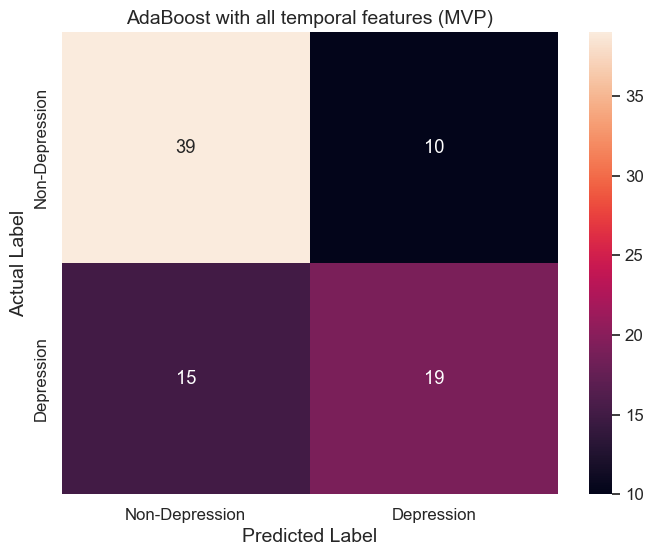

In [232]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("AdaBoost with all temporal features (MVP)", fontsize=14)

plt.show()

From the confusion matrix, True Positive (TP) is 39, True Negative (TN) is 19, False Positive (FP) is 15 and False Negative (FN) is 10.

Out of the 83 predictions, AdaBoost has made 58 correct predictions and 25 incorrect predictions when removing the gender, age and work features.

**Train the AdaBoost model with all temporal features with Leave One Subject Out Cross Validation**

In [233]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [234]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define AdaBoost Classifier
ab_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

In [235]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the AdaBoost model without the gender, age and work features with cross validation

X - predictors (drop number, gender, age, work and depresssion_state columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the AdaBoost model using Leave One Subject Out Cross Validation
    ab_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = ab_clf.predict(X_test)
    
    # Accuracy score for AdaBoost
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for AdaBoost
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for AdaBoost
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for AdaBoost
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for AdaBoost
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for AdaBoost
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for AdaBoost
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for AdaBoost
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for AdaBoost
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for AdaBoost
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.8333333333333334, 0.2, 0.6666666666666666, 0.6666666666666666, 0.14285714285714285, 0.8333333333333334, 0.5, 0.18181818181818182, 1.0, 1.0, 0.4, 0.3, 0.7142857142857143, 1.0, 0.16666666666666666, 0.25, 0.0, 0.4, 0.8, 0.6, 0.16666666666666666, 0.4, 1.0, 0.9285714285714286, 1.0, 0.6666666666666666, 0.5555555555555556, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 0.8571428571428571, 1.0, 0.75, 0.5, 0.3333333333333333, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9285714285714286, 0.6428571428571429, 0.375, 0.8461538461538461, 1.0, 1.0, 1.0, 0.5]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [0.8333333333333334, 0.2, 0.6666666666666666, 0.6666666666666666, 0.14285714285714285, 0.8333333333333334, 0.5, 0.181818181818

Using the Leave One Subject Out Cross Validation, the AdaBoost model has a mean accuracy of 0.7049602417784236 (70.49%) when removing the gender, age and work features

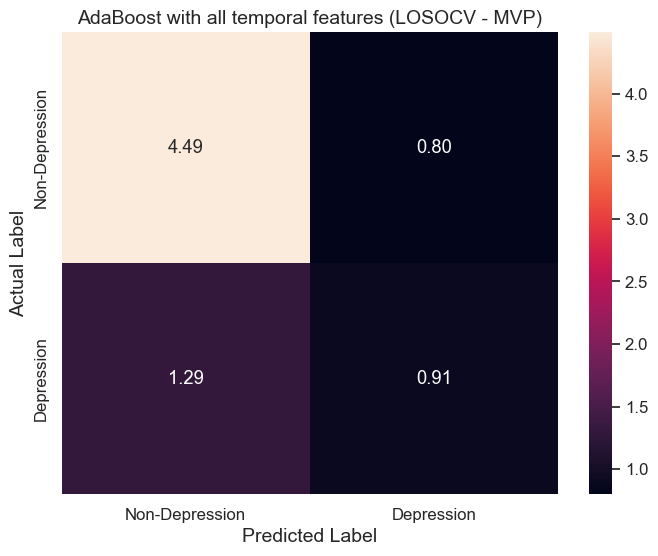

In [236]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of AdaBoost with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "AdaBoost with all temporal features (LOSOCV - MVP)")

From the confusion matrix using the average results from each fold of the Leave One Subject Out Cross Validation, True Positive (TP) is 4.49, True Negative (TN) is 0.91, False Positive (FP) is 1.29 and False Negative (FN) is 0.80.

On an average of 7.49 predictions, AdaBoost has made an average of 5.4 correct predictions and an average of 2.09 incorrect predictions when removing the gender, age and work features.

**Train the AdaBoost model with the relevant features without Leave One Subject Out Cross Validation**

In [237]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [238]:
'''
Train the AdaBoost model with the relevant temporal features without cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

In [239]:
# Data Splitting - split into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
# Check X_train
X_train

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
5,492290.0,6.062835e+08,6.0,487.0,121.0,645.0,0.018246,575.0
45,648569.5,4.581578e+08,18.0,507.0,153.0,679.0,-0.006847,533.0
401,872964.0,6.590095e+08,16.0,515.0,115.0,600.0,-0.103752,239.0
392,10719.0,3.216600e+04,0.0,6.0,0.0,5.0,-0.000011,26.0
118,633344.5,5.015080e+08,25.0,648.0,142.0,795.0,0.029176,636.0
...,...,...,...,...,...,...,...,...
71,1075343.0,1.095891e+09,47.0,638.0,153.0,752.0,-0.073749,0.0
106,978368.5,7.963274e+08,40.0,633.0,145.0,738.0,0.010696,0.0
270,1394837.5,1.431363e+09,62.0,592.0,152.0,709.0,-0.079600,364.0
348,712683.5,7.299986e+08,18.0,501.0,160.0,675.0,-0.021857,557.0


In [241]:
# Check X_test
X_test

,0_Area under the curve,0_Autocorrelation,0_Median absolute diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Slope,0_Zero crossing rate
272,1022557.5,849923175.0,56.0,619.0,137.0,735.0,-0.035562,362.0
55,337284.0,123815164.0,28.0,641.0,134.0,801.0,0.001700,640.0
238,917475.0,687391684.0,35.0,581.0,123.0,716.0,-0.058945,499.0
33,320557.0,172586793.0,0.0,349.0,112.0,551.0,-0.011008,607.0
286,950733.0,793662601.0,68.0,721.0,149.0,838.0,-0.017848,428.0
...,...,...,...,...,...,...,...,...
153,7725.0,23214.0,0.0,21.0,0.0,18.0,-0.000033,92.0
198,844099.5,506985620.0,72.0,738.0,144.0,852.0,0.018197,433.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
406,550528.5,327319639.0,27.0,619.0,141.0,776.0,0.007817,673.0


In [242]:
# Check y_train
y_train

5      1
45     1
401    0
392    0
118    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: depression_state, Length: 329, dtype: int64

In [243]:
# Check y_test
y_test

272    0
55     1
238    0
33     1
286    0
      ..
153    0
198    0
84     1
406    0
172    0
Name: depression_state, Length: 83, dtype: int64

In [244]:
# Train the AdaBoost model
ab_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

In [245]:
# Predict the class for the independent variables
y_pred = ab_clf.predict(X_test)

In [246]:
# Evaluation metric results for AdaBoost with relevant temporal features without cross validation

# Accuracy score for AdaBoost
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Precision score for AdaBoost
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

# Recall score for AdaBoost
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# F1 score for AdaBoost
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Balanced Accuracy score for AdaBoost
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

Accuracy:  0.6987951807228916
Precision:  0.6551724137931034
Recall:  0.5588235294117647
F1 Score:  0.6031746031746031
Balanced Accuracy:  0.6773709483793517


In [247]:
# Confusion matrix for the AdaBoost model with relevant temporal features
confusion_matrix(y_test, y_pred)

array([[39, 10],
       [15, 19]], dtype=int64)

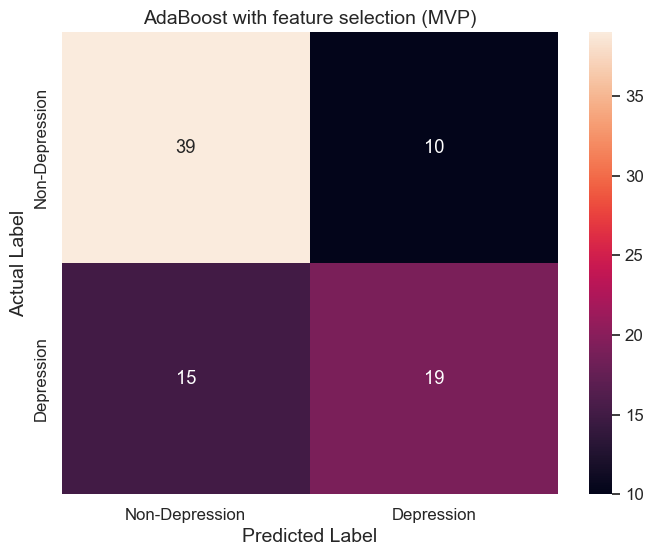

In [248]:
# Figure size and font size scaling
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)

# Visualise the confusion matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
cm.set_xlabel("Predicted Label", fontsize=14)
cm.xaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_ylabel("Actual Label", fontsize=14)
cm.yaxis.set_ticklabels(['Non-Depression', 'Depression'])
cm.set_title("AdaBoost with feature selection (MVP)", fontsize=14)

plt.show()

**Train the AdaBoost model with the relevant features with Leave One Subject Out Cross Validation**

In [249]:
# Load the new_patient_df
new_patient_df

,number,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate,gender,age,work,depression_state
0,condition_1,529098.5,260360039.0,1757.059422,98.834398,0.020283,35.0,0.0,637.0,146.0,787.0,356882.216466,-0.001609,355705.0,597.0,2,3,2.0,1
1,condition_1,391979.0,202303906.0,1795.534242,80.695749,0.070575,18.0,0.0,557.0,140.0,731.0,291846.634297,-0.005997,290424.0,586.0,2,3,2.0,1
2,condition_1,781849.0,661783606.0,951.550246,124.057238,-0.108363,41.0,0.0,641.0,133.0,791.0,447628.189731,-0.091537,446482.0,508.0,2,3,2.0,1
3,condition_1,588840.0,357766319.0,1897.829625,104.238955,0.303973,27.0,0.0,556.0,140.0,706.0,376521.644900,0.008348,375156.0,542.0,2,3,2.0,1
4,condition_1,569479.0,377305851.0,1891.389203,97.422617,-0.138927,24.0,0.0,570.0,135.0,720.0,351974.386962,-0.006460,350624.0,605.0,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,control_9,568527.5,455158901.0,1954.237441,97.376216,-0.005835,17.0,0.0,596.0,145.0,762.0,351698.415604,-0.008244,350457.0,614.0,2,2,1.0,0
408,control_9,639341.5,427487094.0,1552.014578,114.720478,0.070853,30.0,0.0,696.0,135.0,826.0,413880.570747,-0.029459,412879.0,394.0,2,2,1.0,0
409,control_9,445720.0,245550482.0,1921.877606,83.876632,0.033343,18.0,0.0,631.0,155.0,752.0,303140.678671,0.005372,301872.0,416.0,2,2,1.0,0
410,control_9,62063.0,19106686.0,196.317471,6.282301,-0.146707,0.0,0.0,131.0,14.0,138.0,25871.186818,-0.016963,22610.0,2.0,2,2,1.0,0


In [250]:
# Initialise the Leave One Subject Out Cross Validation
logo = LeaveOneGroupOut()

# Define AdaBoost Classifier
ab_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

In [251]:
# Provide a list of the evaluation metric results
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []
balanced_accuracy_results = []

# Provide a list to store confusion matrices
conf_matrices = []

'''
Train the AdaBoost model with the relevant temporal features without cross validation

X - predictors (drop number, gender, age, work, depresssion_state and the irrelevant temporal columns)
y - class (depresssion_state column)
'''
X = new_patient_df.drop(["number", "gender", "age", "work",
                         "0_Centroid", "0_Mean absolute diff",
                         "0_Mean diff", "0_Median diff",
                         "0_Signal distance", "0_Sum absolute diff", "depression_state"], axis=1)
y = new_patient_df["depression_state"]

# Perform Leave One Subject Out Cross Validation
for train_index, test_index in logo.split(X, y, groups=new_patient_df["number"]):
    # Define the train and test data for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the AdaBoost model using Leave One Subject Out Cross Validation
    ab_clf.fit(X_train, y_train)
    
    # Predict the class for the independent variables
    y_pred = ab_clf.predict(X_test)
    
    # Accuracy score for AdaBoost
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    # Precision score for AdaBoost
    precision = precision_score(y_test, y_pred)
    precision_results.append(precision)

    # Recall score for AdaBoost
    recall = recall_score(y_test, y_pred)
    recall_results.append(recall)

    # F1 score for AdaBoost
    f1 = f1_score(y_test, y_pred)
    f1_score_results.append(f1)

    # Balanced Accuracy score for AdaBoost
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy_results.append(balanced_accuracy)
    
    # Confusion matrix after testing each patient
    conf_matrices.append(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Precision:", precision_results)
print("Recall:", recall_results)
print("F1 Score:", f1_score_results)
print("Balanced Accuracy:", balanced_accuracy_results)

'''
Calculate the mean results for the evaluation metrics
'''
# Mean accuracy for AdaBoost
mean_accuracy = np.mean(accuracy_results)
print("Mean Accuracy: ", mean_accuracy)

# Mean precision for AdaBoost
mean_precision = np.mean(precision_results)
print("Mean Precision: ", mean_precision)

# Mean recall for AdaBoost
mean_recall = np.mean(recall_results)
print("Mean Recall: ", mean_recall)

# Mean F1 score for AdaBoost
mean_f1_score = np.mean(f1_score_results)
print("Mean F1 Score: ", mean_f1_score)

# Mean balanced accuracy for AdaBoost
mean_balanced_accuracy = np.mean(balanced_accuracy_results)
print("Mean Balanced Accuracy: ", mean_balanced_accuracy)

Accuracy: [0.8333333333333334, 0.2, 0.6666666666666666, 0.6666666666666666, 0.2857142857142857, 0.8333333333333334, 0.6666666666666666, 0.18181818181818182, 1.0, 1.0, 0.6, 0.3, 0.7142857142857143, 1.0, 0.16666666666666666, 0.375, 0.0, 0.4, 0.6, 0.8, 0.16666666666666666, 0.6, 1.0, 0.8571428571428571, 1.0, 0.6666666666666666, 0.6666666666666666, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 0.8571428571428571, 1.0, 0.75, 0.625, 0.3333333333333333, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9285714285714286, 0.6428571428571429, 0.375, 0.9230769230769231, 1.0, 0.9285714285714286, 1.0, 0.375]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall: [0.8333333333333334, 0.2, 0.6666666666666666, 0.6666666666666666, 0.2857142857142857, 0.8333

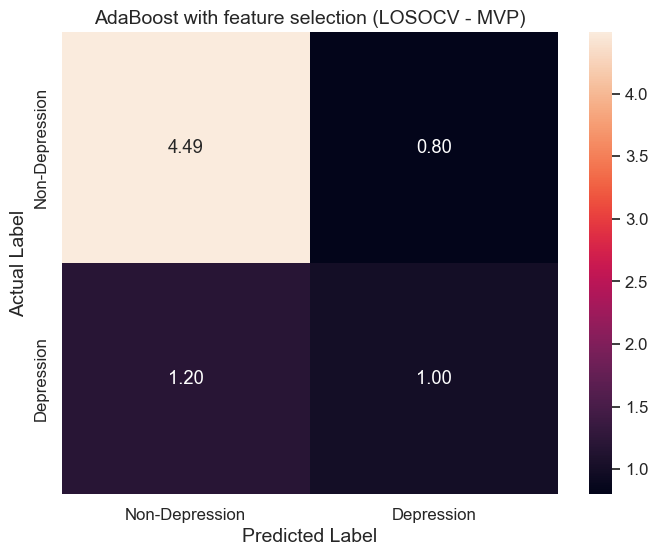

In [252]:
# Maximum dimensions for all confusion matrix
maximum_rows = max(conf_matrix.shape[0] for conf_matrix in conf_matrices)
maximum_columns = max(conf_matrix.shape[1] for conf_matrix in conf_matrices)

# Pad each confusion matrix in each fold of the LOSOCV to ensure they have the same shape
pad_matrices = []

for conf_matrix in conf_matrices:
    pad_width = ((0, maximum_rows - conf_matrix.shape[0]), (0, maximum_columns - conf_matrix.shape[1]))
    pad_matrix = np.pad(conf_matrix, pad_width, mode='constant')
    pad_matrices.append(pad_matrix)

# Mean confusion matrix of AdaBoost with the features with Leave One Subject Out Cross Validation
mean_conf_matrix = np.mean(pad_matrices, axis=0)

# Plot the confusion matrix
plot_confusion_matrix_cross_validation(mean_conf_matrix, 
                                       "AdaBoost with feature selection (LOSOCV - MVP)")

## References

Garcia-Ceja, E., Riegler, M., Jakobsen, P., Tøressen, J., Nordgreen, T., Oedegaard, K. J. and Fasmer O. B. (2018) 'Depresjon: a motor activity database of depression episodes in unipolar and bipolar patients', <i>MMSys '18: Proceedings of the 9th ACM Multimedia Systems Conference</i>, Amsterdam, Netherlands, 12-15 June 2018. New York: Association for Computing Machinery, pp. 472-477. Available at: <a href="https://doi.org/10.1145/3204949.3208125">https://doi.org/10.1145/3204949.3208125</a> (Accessed: 15 February 2024).